NanoToxicity Prediction Dataset Exploration

Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1.- Problem Statement
- This project aims to predict the toxicity of various nanomaterials using machine learning techniques. Accurate prediction of nanotoxicity is crucial for ensuring the safety of nanomaterials in various applications, including medicine, electronics, and environmental science.
- The goal is to provide a reliable in silico tool to assess nanomaterial safety, reducing the reliance on costly and time-consuming in vitro or in vivo experiments."

2.- Data Collection
- The dataset used in this project is a mixed dataset which is composed by 2 different sources:
- NanoPharos database: https://db.nanopharos.eu/ (which is part of S2NANO project database: https://www.s2nano.org/)
- NanoTox/ToxicityModel: https://doi.org/10.5281/zenodo.4055281 (which is part of S2NANO project database: https://www.s2nano.org/)


2.1 Import Data and Libraries

In [1]:
import dataclasses
import sys,os
import pandas as pd
import numpy as np
import matplotlib  as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


%pwd
os.chdir("..")


data = pd.read_csv('artifacts/20260202024516/data_ingestion/feature_store/MeOx_data.csv')
data.head()

,Material type,Core size (nm),Method core size,Hydro size (nm),Method hydro size,Surface charge (mV),Method surface charge,Surface area (m2/g),Method surface area,_Hsf (eV),Ec (eV),Ev (eV),_MeO (eV),Assay,Cell name,Cell species,Exposure time,Exposure dose (ug/mL),Viability (%),Toxicity
0,CuO,12.8,TEM,313.8,DLS,7.6,Zeta-potential,74.2,Estimation,-1.609,-5.17,-6.51,5.87,ATP,RAW264.7,Mouse,24h,200.0,9.1,Toxic
1,ZnO,22.6,TEM,114.7,DLS,28.8,Zeta-potential,47.4,Estimation,-3.608,-3.89,-7.20,5.67,ATP,BEAS-2B,Human,24h,200.0,9.5,Toxic
2,ZnO,22.6,TEM,114.7,DLS,28.8,Zeta-potential,47.4,Estimation,-3.608,-3.89,-7.20,5.67,ATP,BEAS-2B,Human,24h,100.0,10.2,Toxic
3,ZnO,22.6,TEM,69.4,DLS,28.8,Zeta-potential,47.4,Estimation,-3.608,-3.89,-7.20,5.67,ATP,RAW264.7,Mouse,24h,100.0,11.0,Toxic
4,Mn2O3,51.5,TEM,291.7,DLS,-46.1,Zeta-potential,25.9,Estimation,-9.917,-4.65,-7.63,5.92,ATP,RAW264.7,Mouse,24h,200.0,11.3,Toxic


2.2 Dataset Information
- Material Type : Metal Oxides (MeOx)
- Core Size(nm) : size of the nanoparticle core in nanometers
- Method core size : method used to determine the core size (e.g., TEM, XRD)
- Hydro size(nm) : hydrodynamic size of the nanoparticle in nanometers
- Method hydro size : method used to determine the hydrodynamic size (e.g., DLS)
- Surface charge(mV) : surface charge of the nanoparticle in millivolts
- Method surface charge : method used to determine the surface charge (e.g., Zeta Potential)
- Surface area(m2/g) : surface area of the nanoparticle in square meters per gram
- Method surface area : method used to determine the surface area (e.g., BET)
- _HsF (eV) : Standard Heat of Formation. The change in enthalpy during the formation of the metal oxide from its elements. It indicates the thermodynamic stability of the crystal structure (lower values imply higher stability).
- Ec (eV) : Conduction Band Energy. The lowest energy level of the conduction band. It determines the reduction potential of the nanomaterial and its ability to transfer electrons to biological molecules (critical for ROS generation).
- Ev (eV) : Valence Band Energy. The highest energy level of the valence band. It dictates the oxidation potential and the hole ($h^+$) availability for oxidative reactions.
- _MeO (eV) : Metal-Oxygen Bond Enthalpy. The bond dissociation energy between the metal cation and the oxygen anion. It reflects the lattice strength and predicts the likelihood of metal ion release (dissolution) into the cellular environment.
- Assay : Cytotoxicity Assay Type. The specific biochemical technique used to measure cell viability (e.g., MTT, WST-1, LDH, Alamar Blue). Different assays measure different metabolic endpoints.
- Cell name : Cell Line Identity. The specific immortalized cell line or primary culture used in the experiment (e.g., A549, HeLa, HepG2).
- Cell species : Organism of Origin. The biological species from which the cells were derived (e.g., Human, Mouse, Hamster). Crucial for assessing inter-species sensitivity.
- Exposure time (h) : Exposure Duration. The length of time the cells were in contact with the nanomaterials, measured in hours.
- Exposure dose (ug/mL) : Concentration. The amount of nanomaterial applied to the cell culture per unit of volume, typically measured in micrograms per milliliter.
- Viability (%) : Cell Viability. The percentage of living cells remaining after exposure compared to the unexposed control group. This is the target variable for the regression model.
- Toxicity Class : Toxicity Classification. A categorical label indicating whether the nanomaterial is considered 'Toxic' or 'Non-Toxic' based on a predefined viability threshold (e.g., <70% viability = Toxic).

3.- Data Checks to perform
- check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [ ]:

data.isna().sum()



dThere are missing values in method columns

Check Duplicates

In [ ]:
data.duplicated().sum()

In [ ]:
# Muestra las filas duplicadas para revisarlas
display(data[data.duplicated()])


3.1 Check Data Types

In [ ]:
data.info()

3.2 Check Unique Values in Each Column

In [ ]:
data.nunique()

3.3 Check Statistics of Dataset

In [ ]:
data.describe()

4.- Data Visualization


- Material type: str
- Core size (nm): float64
- Method core size: str
- Hydro size (nm): float64
- Method hydro size: str
- Surface charge (mV): float64
- Method surface charge: str
- Surface area (m2/g): float64
- Method surface area: str
- _Hsf (eV): float64
- Ec (eV): float64
- Ev (eV): float64
- _MeO (eV): float64
- Assay: str
- Cell name: str
- Cell species: str
- Exposure time: str
- Exposure dose (ug/mL): float64
- Viability (%): float64
- Toxicity: str

In [6]:
data['Toxicity'].value_counts()

Toxicity
Nontoxic    637
nonToxic    210
Toxic       129
Name: count, dtype: int64

5.- Data Cleaning and Preprocessing

Here we will handle missing values,drop columns which are not important, encode categorical variables, and scale numerical features as needed


====== EJECUTANDO PASO 1: LIMPIEZA ======
Iniciando la limpieza de datos...
Archivo cargado exitosamente desde: artifacts/20260202024516/data_ingestion/feature_store/MeOx_data.csv
Columnas eliminadas: ['Method core size', 'Method hydro size', 'Method surface charge', 'Method surface area', 'Assay', 'Cell name', 'Cell species', 'Viability (%)']
Se aplicó One-Hot Encoding a la columna 'Material type'.
Se encontraron 333 filas duplicadas. Se eliminarán.

--- Reporte Final Paso 1 ---
Top 10 columnas con más valores NaN:
 Core size (nm)           0
Hydro size (nm)          0
Surface charge (mV)      0
Surface area (m2/g)      0
_Hsf (eV)                0
Ec (eV)                  0
Ev (eV)                  0
_MeO (eV)                0
Exposure time            0
Exposure dose (ug/mL)    0
dtype: int64
Total de valores NaN en el dataset: 0
Dimensiones del DataFrame final: (643, 26)

====== EJECUTANDO PASO 2: MULTICOLINEALIDAD ======
--- Iniciando manejo de multicolinealidad ---

[Paso 1] Colu

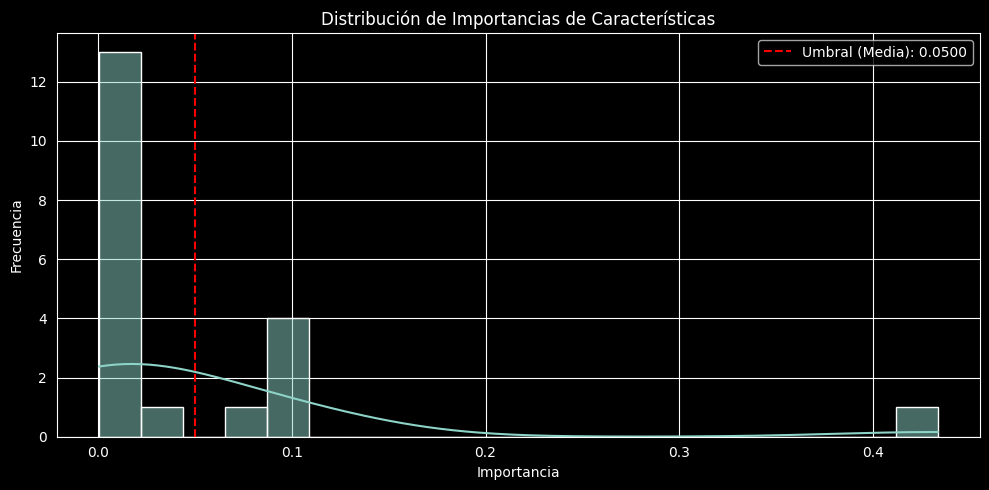


Características seleccionadas (6 de 20):
['Exposure dose (ug/mL)', 'Exposure time', 'Core size (nm)', 'Material type_ZnO', 'Hydro size (nm)', 'Surface charge (mV)']

Entrenando modelo final con características seleccionadas...

--- Reporte de Clasificación del Modelo Final (Paso 3) ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       110
           1       0.83      0.53      0.65        19

    accuracy                           0.91       129
   macro avg       0.88      0.75      0.80       129
weighted avg       0.91      0.91      0.91       129


====== EJECUTANDO PASO 4: ANÁLISIS DE N-VARIABLES ÓPTIMAS ======
Buscando número óptimo de variables...


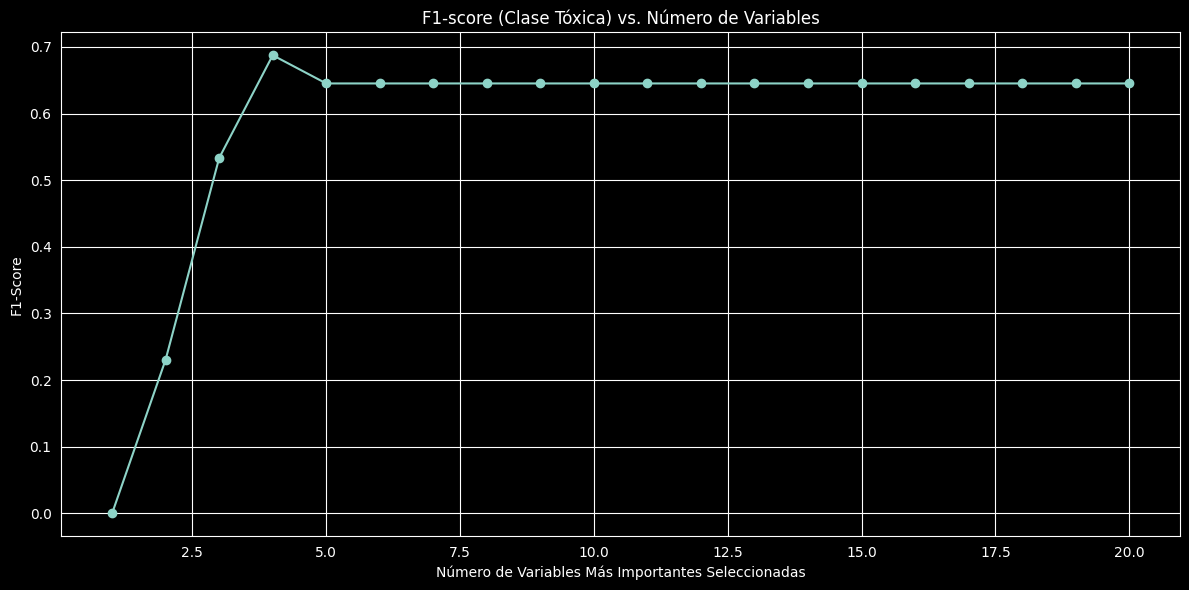

✅ Mejor F1-score (clase 1): 0.6875 usando las 4 variables más importantes.

====== EJECUTANDO PASO 5: EVALUACIÓN DE COMBINACIONES DE GRUPOS ======
Evaluando 4 combinaciones de características...


100%|██████████| 4/4 [00:22<00:00,  5.54s/it]


--- Tabla Resumen de Resultados (ordenado por F1-score en Test) ---
                                                  groups  threshold   f1_test
0  (Exposure dose (ug/mL), Material type, Exposure time)      0.605  0.731707
1                 (Exposure dose (ug/mL), Material type)      0.610  0.714286
2                         (Material type, Exposure time)      0.470  0.547945
3                 (Exposure dose (ug/mL), Exposure time)      0.375  0.477612

--- Reporte de Clasificación para la Mejor Combinación ---
Grupos: ('Exposure dose (ug/mL)', 'Material type')
Umbral Óptimo: 0.6100
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.71      0.71      0.71        21

    accuracy                           0.91       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.91      0.91      0.91       129


====== EJECUTANDO PASO 6: PREPARACIÓN FINAL DE DATASET DE PRODUCCIÓN ======
Colu

In [5]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

DESCRIPTIVE_COLS_TO_DROP = [
    "ERM ID", "Method core size", "Method hydro size", "Method surface charge",
    "Method surface area", "Assay", "Cell name", "Cell species",
    "Cell origin", "Cell type"
]

PROXY_COLS_TO_DROP = ["Viability (%)"]

TOXICITY_MAPPING = {
    "nontoxic": 0,
    "toxic": 1
}

STEP_5_CONFIG = {
    'test_size': 0.20,
    'random_state': 42,
    'cv_splits': 5,
    'model_params': {
        'n_estimators': 600,
        'class_weight': 'balanced_subsample',
        'random_state': 42,
        'n_jobs': -1
    },
    'candidate_groups': [
        'Exposure dose (ug/mL)',
        'Material type',
        'Exposure time'
    ]
}

STEP_6_CONFIG = {
    'output_path': 'research/dataset_research.csv',
    'BEST_COMBINATION': [
        'Exposure dose (ug/mL)',
        'Material type',
        'Exposure time'
    ]
}

def clean_metal_oxide_data(input_path: str) -> pd.DataFrame:
    print("Iniciando la limpieza de datos...")
    try:
        data = pd.read_csv(input_path, sep=None, engine="python", encoding="utf-8-sig")
        print(f"Archivo cargado exitosamente desde: {input_path}")
    except FileNotFoundError:
        print(f"Error: No se pudo encontrar el archivo en la ruta: {input_path}")
        return None

    cols = pd.Index(data.columns.astype(str))
    cols = cols.str.replace(r"^\ufeff", "", regex=True).str.strip()
    cols = cols.map(lambda s: unicodedata.normalize("NFKC", s))
    data.columns = cols

    data = data.dropna(axis=1, how="all")
    data = data.loc[:, ~data.columns.str.contains(r"^Unnamed", na=False, case=False)]
    assert not any(c.lower().startswith("unnamed") for c in data.columns), "Error: Aún quedan columnas 'Unnamed'."

    cols_to_drop = DESCRIPTIVE_COLS_TO_DROP + PROXY_COLS_TO_DROP
    existing_cols_to_drop = [c for c in cols_to_drop if c in data.columns]
    data = data.drop(columns=existing_cols_to_drop)
    print(f"Columnas eliminadas: {existing_cols_to_drop}")

    if "Toxicity" not in data.columns:
        raise ValueError("Error crítico: No se encuentra la columna objetivo 'Toxicity' en el dataset.")

    data["Toxicity"] = data["Toxicity"].astype(str).str.strip().str.lower().map(TOXICITY_MAPPING)

    if data["Toxicity"].isna().any():
        problematic_rows = data["Toxicity"].isna().sum()
        print(f"Advertencia: Se encontraron {problematic_rows} filas con valores de 'Toxicity' no mapeados. Estas filas serán eliminadas.")
        data = data.dropna(subset=["Toxicity"])

    data["Toxicity"] = data["Toxicity"].astype(int)

    if "Exposure time" in data.columns:
        data["Exposure time"] = (
            data["Exposure time"]
            .astype(str)
            .str.extract(r"(\d+\.?\d*)", expand=False)
            .astype(float)
        )

    dose_cols = [c for c in data.columns if "Exposure dose" in c]
    for col in dose_cols:
        data[col] = pd.to_numeric(data[col], errors="coerce")

    if "Material type" in data.columns:
        try:
            ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
        except TypeError:
            ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

        material_type_encoded = ohe.fit_transform(data[["Material type"]])
        feature_names = ohe.get_feature_names_out(["Material type"])

        encoded_df = pd.DataFrame(material_type_encoded, columns=feature_names, index=data.index)

        data = pd.concat([data.drop(columns=["Material type"]), encoded_df], axis=1)
        print("Se aplicó One-Hot Encoding a la columna 'Material type'.")
    else:
        print("Advertencia: No se encontró la columna 'Material type'; se omite el One-Hot Encoding.")

    num_duplicates = data.duplicated().sum()
    if num_duplicates > 0:
        print(f"Se encontraron {num_duplicates} filas duplicadas. Se eliminarán.")
        data = data.drop_duplicates(keep="first")

    print("\n--- Reporte Final Paso 1 ---")
    print("Top 10 columnas con más valores NaN:\n", data.isna().sum().sort_values(ascending=False).head(10))
    print(f"Total de valores NaN en el dataset: {int(data.isna().sum().sum())}")
    print(f"Dimensiones del DataFrame final: {data.shape}")

    return data

def remove_high_correlation_features(df: pd.DataFrame, threshold: float = 0.9, protected_prefix: str = 'Material type_') -> tuple[pd.DataFrame, list]:
    protected_cols = [col for col in df.columns if col.startswith(protected_prefix)]
    other_cols = [col for col in df.columns if not col.startswith(protected_prefix)]

    protected_df = df[protected_cols]
    other_df = df[other_cols]

    dropped_cols = []

    corr_matrix_other = other_df.corr().abs()
    upper = corr_matrix_other.where(np.triu(np.ones(corr_matrix_other.shape), k=1).astype(bool))

    cols_to_drop_internal = [column for column in upper.columns if any(upper[column] > threshold)]
    other_df = other_df.drop(columns=cols_to_drop_internal)
    dropped_cols.extend(cols_to_drop_internal)

    combined_df = pd.concat([other_df, protected_df], axis=1)
    corr_matrix_cross = combined_df.corr().abs()

    cols_to_drop_cross = []
    for col in other_df.columns:
        if corr_matrix_cross.loc[col, protected_cols].max() > threshold:
            cols_to_drop_cross.append(col)

    other_df = other_df.drop(columns=cols_to_drop_cross)
    dropped_cols.extend(cols_to_drop_cross)

    final_df = pd.concat([other_df, protected_df], axis=1)

    return final_df, dropped_cols

def remove_zero_variance_features(df: pd.DataFrame) -> tuple[pd.DataFrame, list]:
    df_out = df.copy()
    cols_to_drop = df_out.columns[df_out.nunique() <= 1]
    df_out = df_out.drop(columns=cols_to_drop)
    return df_out, list(cols_to_drop)

def remove_high_vif_features(df: pd.DataFrame, threshold: float = 10.0) -> tuple[pd.DataFrame, list]:
    df_out = df.copy()
    dropped_features = []

    while True:
        if df_out.shape[1] < 2:
            break

        variables = df_out.columns
        vif_data = [variance_inflation_factor(df_out.values, i) for i in range(df_out.shape[1])]
        vif = pd.DataFrame({"VIF": vif_data}, index=variables)

        max_vif = vif['VIF'].max()

        if max_vif > threshold:
            feature_to_drop = vif['VIF'].idxmax()
            print(f"Eliminando '{feature_to_drop}' con VIF = {max_vif:.2f}")
            df_out = df_out.drop(columns=[feature_to_drop])
            dropped_features.append(feature_to_drop)
        else:
            break

    return df_out, dropped_features

def handle_multicollinearity(X: pd.DataFrame, corr_thresh: float, vif_thresh: float) -> pd.DataFrame:
    print("--- Iniciando manejo de multicolinealidad ---")

    X_uncorrelated, dropped_corr = remove_high_correlation_features(X, corr_thresh, protected_prefix='Material type_')
    print(f"\n[Paso 1] Columnas eliminadas por alta correlación (> {corr_thresh}): {len(dropped_corr)}")
    if dropped_corr: print(f"   -> {dropped_corr}")

    X_no_zero_var, dropped_zero_var = remove_zero_variance_features(X_uncorrelated)
    if dropped_zero_var:
        print(f"\n[Paso 2] Columnas eliminadas por varianza cero: {len(dropped_zero_var)}")
        print(f"   -> {dropped_zero_var}")

    print(f"\n[Paso 3] Calculando VIF con umbral = {vif_thresh}...")
    X_final, dropped_vif = remove_high_vif_features(X_no_zero_var, vif_thresh)
    print(f"Total de columnas eliminadas por VIF: {len(dropped_vif)}")

    print("\n--- Proceso completado ---")
    return X_final

def get_feature_importances(X_train: pd.DataFrame, y_train: pd.Series, n_estimators: int, random_state: int) -> pd.DataFrame:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    model.fit(X_train, y_train)

    importances = model.feature_importances_
    df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    return df

def plot_importance_distribution(importances_df: pd.DataFrame, threshold: float):
    plt.figure(figsize=(10, 5))
    sns.histplot(importances_df['Importance'], kde=True, bins=20)
    plt.axvline(threshold, color='red', linestyle='--', label=f'Umbral (Media): {threshold:.4f}')
    plt.title('Distribución de Importancias de Características')
    plt.xlabel('Importancia')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

def select_and_evaluate_features(X: pd.DataFrame, y: pd.Series, config: dict):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=config['test_size'], random_state=config['random_state']
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

    print("Entrenando modelo inicial para obtener importancia de características...")
    importances_df = get_feature_importances(
        X_train_scaled, y_train, config['n_estimators'], config['random_state']
    )

    mean_importance = importances_df['Importance'].mean()
    print(f"\nUmbral de selección (media de importancia): {mean_importance:.4f}")

    plot_importance_distribution(importances_df, mean_importance)

    selected_features = importances_df[importances_df['Importance'] > mean_importance]['Feature'].tolist()
    print(f"\nCaracterísticas seleccionadas ({len(selected_features)} de {len(X.columns)}):")
    print(selected_features)

    X_train_selected = X_train_scaled[selected_features]
    X_test_selected = X_test_scaled[selected_features]

    print("\nEntrenando modelo final con características seleccionadas...")
    final_model = RandomForestClassifier(n_estimators=config['n_estimators'], random_state=config['random_state'], n_jobs=-1)
    final_model.fit(X_train_selected, y_train)
    y_pred = final_model.predict(X_test_selected)

    print('\n--- Reporte de Clasificación del Modelo Final (Paso 3) ---')
    print(classification_report(y_test, y_pred))

    final_X = X[selected_features]
    final_df = pd.concat([final_X, y], axis=1)
    return final_df, selected_features

def define_feature_groups(X: pd.DataFrame) -> dict:
    return {
        'Exposure dose (ug/mL)': ['Exposure dose (ug/mL)'],
        'Material type': [c for c in X.columns if c.startswith('Material type_')],
        'Surface area (m2/g)': ['Surface area (m2/g)'],
        'Exposure time': ['Exposure time'],
        'Core size (nm)': ['Core size (nm)'],
        'Hydro size (nm)': ['Hydro size (nm)'],
    }

def get_columns_for_groups(groups: tuple, group_definitions: dict) -> list:
    cols = []
    for g in groups:
        cols.extend(group_definitions.get(g, []))
    return cols

def find_optimal_threshold_cv(X_train: pd.DataFrame, y_train: pd.Series, columns: list, n_splits: int, model_params: dict) -> float:
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=model_params['random_state'])
    best_thresholds = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_t, X_v = X_train.iloc[train_idx][columns], X_train.iloc[val_idx][columns]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        clf = RandomForestClassifier(**model_params)
        clf.fit(X_t, y_t)

        probs = clf.predict_proba(X_v)[:, 1]
        thresholds = np.linspace(0.05, 0.95, 181)
        f1s = [f1_score(y_v, (probs >= t).astype(int), pos_label=1) for t in thresholds]
        best_thresholds.append(thresholds[np.argmax(f1s)])

    return float(np.median(best_thresholds))

def evaluate_combination(groups: tuple, X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series, group_defs: dict, config: dict) -> dict:
    cols = get_columns_for_groups(groups, group_defs)

    optimal_thr = find_optimal_threshold_cv(X_train, y_train, cols, config['cv_splits'], config['model_params'])

    clf = RandomForestClassifier(**config['model_params'])
    clf.fit(X_train[cols], y_train)

    probs_test = clf.predict_proba(X_test[cols])[:, 1]
    y_pred_test = (probs_test >= optimal_thr).astype(int)

    f1 = f1_score(y_test, y_pred_test, pos_label=1)
    report = classification_report(y_test, y_pred_test, output_dict=False)

    return {'groups': groups, 'threshold': optimal_thr, 'f1_test': f1, 'report': report}

def parse_combination(combination: list, all_columns: list) -> tuple[list, list]:
    continuous_cols = []
    categorical_cols = []
    for group_name in combination:
        if group_name == 'Material type':
            mt_cols = [c for c in all_columns if c.startswith('Material type_')]
            categorical_cols.extend(mt_cols)
        else:
            continuous_cols.append(group_name)
    return continuous_cols, categorical_cols

def prepare_final_dataset(df: pd.DataFrame, config: dict) -> pd.DataFrame:
    cont_cols, cat_cols = parse_combination(config['BEST_COMBINATION'], df.columns)
    y_col = 'Toxicity'

    final_cols_to_keep = cont_cols + cat_cols + [y_col]
    missing_cols = [c for c in final_cols_to_keep if c not in df.columns]
    if missing_cols:
        raise ValueError(f"Faltan columnas requeridas en el DataFrame: {missing_cols}")

    df_final = df[final_cols_to_keep].copy()

    if cont_cols:
        scaler = MinMaxScaler(feature_range=(0, 1))
        df_final[cont_cols] = scaler.fit_transform(df_final[cont_cols])
        print(f"Columnas continuas escaladas con MinMaxScaler: {cont_cols}")
    else:
        print("No se encontraron columnas continuas para escalar.")

    return df_final

if __name__ == "__main__":
    INPUT_FILE_PATH = "artifacts/20260202024516/data_ingestion/feature_store/MeOx_data.csv"

    print("\n====== EJECUTANDO PASO 1: LIMPIEZA ======")
    cleaned_data = clean_metal_oxide_data(input_path=INPUT_FILE_PATH)

    if cleaned_data is not None:
        print("\n====== EJECUTANDO PASO 2: MULTICOLINEALIDAD ======")
        if 'Toxicity' in cleaned_data.columns:
            X = cleaned_data.drop(columns=['Toxicity'])
            y = cleaned_data['Toxicity']

            X_cleaned = handle_multicollinearity(
                X=X,
                corr_thresh=0.9,
                vif_thresh=10.0
            )

            df_vif_corrected = pd.concat([X_cleaned, y], axis=1)

            print("\n====== EJECUTANDO PASO 3: SELECCIÓN DE CARACTERÍSTICAS ======")
            rf_config = {
                'n_estimators': 100,
                'test_size': 0.2,
                'random_state': 42
            }
            df_rf_selected, selected_features_rf = select_and_evaluate_features(
                X=df_vif_corrected.drop(columns=['Toxicity']),
                y=df_vif_corrected['Toxicity'],
                config=rf_config
            )

            print("\n====== EJECUTANDO PASO 4: ANÁLISIS DE N-VARIABLES ÓPTIMAS ======")
            X_step4 = df_vif_corrected.drop(columns=['Toxicity'])
            y_step4 = df_vif_corrected['Toxicity']

            X_train, X_test, y_train, y_test = train_test_split(X_step4, y_step4, test_size=0.2, random_state=42)
            scaler = StandardScaler()
            X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_step4.columns)
            X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_step4.columns)

            model_importances = RandomForestClassifier(n_estimators=100, random_state=42)
            model_importances.fit(X_train_scaled, y_train)

            importances_df = pd.DataFrame({
                'Feature': X_step4.columns,
                'Importance': model_importances.feature_importances_
            }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

            sorted_features = importances_df['Feature'].tolist()
            f1_scores = []
            num_features_list = range(1, len(sorted_features) + 1)

            print("Buscando número óptimo de variables...")
            for n in num_features_list:
                selected = sorted_features[:n]
                X_train_n = X_train_scaled[selected]
                X_test_n = X_test_scaled[selected]
                model = RandomForestClassifier(n_estimators=100, random_state=42)
                model.fit(X_train_n, y_train)
                y_pred_n = model.predict(X_test_n)
                score = f1_score(y_test, y_pred_n, pos_label=1, zero_division=0)
                f1_scores.append(score)

            plt.figure(figsize=(12, 6))
            plt.plot(num_features_list, f1_scores, marker='o', linestyle='-')
            plt.title("F1-score (Clase Tóxica) vs. Número de Variables")
            plt.xlabel("Número de Variables Más Importantes Seleccionadas")
            plt.ylabel("F1-Score")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            best_n = num_features_list[np.argmax(f1_scores)]
            best_f1 = max(f1_scores)
            print(f"✅ Mejor F1-score (clase 1): {best_f1:.4f} usando las {best_n} variables más importantes.")

            print("\n====== EJECUTANDO PASO 5: EVALUACIÓN DE COMBINACIONES DE GRUPOS ======")
            X_step5 = df_vif_corrected.drop(columns=['Toxicity'])
            y_step5 = df_vif_corrected['Toxicity']

            X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
                X_step5, y_step5, test_size=STEP_5_CONFIG['test_size'], stratify=y_step5, random_state=STEP_5_CONFIG['random_state']
            )

            feature_groups = define_feature_groups(X_step5)
            all_combos = []
            for k in range(2, 4):
                all_combos.extend(list(combinations(STEP_5_CONFIG['candidate_groups'], k)))

            print(f"Evaluando {len(all_combos)} combinaciones de características...")
            results = [evaluate_combination(combo, X_train_5, y_train_5, X_test_5, y_test_5, feature_groups, STEP_5_CONFIG) for combo in tqdm(all_combos)]

            summary_df = pd.DataFrame([
                {'groups': r['groups'], 'threshold': r['threshold'], 'f1_test': r['f1_test']} for r in results
            ]).sort_values('f1_test', ascending=False).reset_index(drop=True)

            print("\n--- Tabla Resumen de Resultados (ordenado por F1-score en Test) ---")
            print(summary_df.to_string())

            if not summary_df.empty:
                best_combination_idx = summary_df.index[0]
                best_result = results[best_combination_idx]
                print("\n--- Reporte de Clasificación para la Mejor Combinación ---")
                print(f"Grupos: {best_result['groups']}")
                print(f"Umbral Óptimo: {best_result['threshold']:.4f}")
                print(best_result['report'])

            print("\n====== EJECUTANDO PASO 6: PREPARACIÓN FINAL DE DATASET DE PRODUCCIÓN ======")
            final_df = prepare_final_dataset(df_vif_corrected, STEP_6_CONFIG)

            final_df.to_csv(STEP_6_CONFIG['output_path'], index=False)

            print(f"\n✅ Proceso completado. Archivo final guardado en: {STEP_6_CONFIG['output_path']}")
            print(f"Dimensiones del archivo final: {final_df.shape}")
            print(f"Columnas guardadas: {final_df.columns.tolist()}")

            continuous_final_cols = [c for c in STEP_6_CONFIG['BEST_COMBINATION'] if c != 'Material type']
            if continuous_final_cols:
                print("\nEstadísticas de las columnas continuas (escaladas):")
                print(final_df[continuous_final_cols].describe().round(4))

        else:
            print("Error: No se encontró la columna 'Toxicity' después de la limpieza.")

6.- Mahchine Learning Model exploration and hyperparameter tuning

6.1 Random Forest Classifier applying optuna hyperband Pruner and TPE sampler

=== INICIANDO OPTIMIZACIÓN RF (OPTUNA + HYPERBAND) ===
Datos cargados. Shape: (643, 18)
Ejecutando 100 trials con Hyperband...

Optimización completada.

MEJOR RESULTADO (Validación Cruzada):
   Balanced Accuracy: 0.9027 ± 0.0345
   Accuracy General:  0.8951 ± 0.0331
----------------------------------------
   Puntajes (Balanced Acc) por Fold:
      Fold 1: 0.9241
      Fold 2: 0.9066
      Fold 3: 0.8430
      Fold 4: 0.8940
      Fold 5: 0.9455
----------------------------------------
   Hiperparámetros:   {'n_estimators': 386, 'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}
------------------------------------------------------------

Entrenando modelo final...
   Umbral optimizado: 0.5107

REPORTE FINAL (TEST SET):
Accuracy:          0.9457
Balanced Accuracy: 0.9484
ROC-AUC:           0.9854

Matriz de Confusión:
[[102   6]
 [  1  20]]

   [Pred 0] [Pred 1]
[Real 0]   102      6
[Real 1]   1      20

Reporte Clasificación:


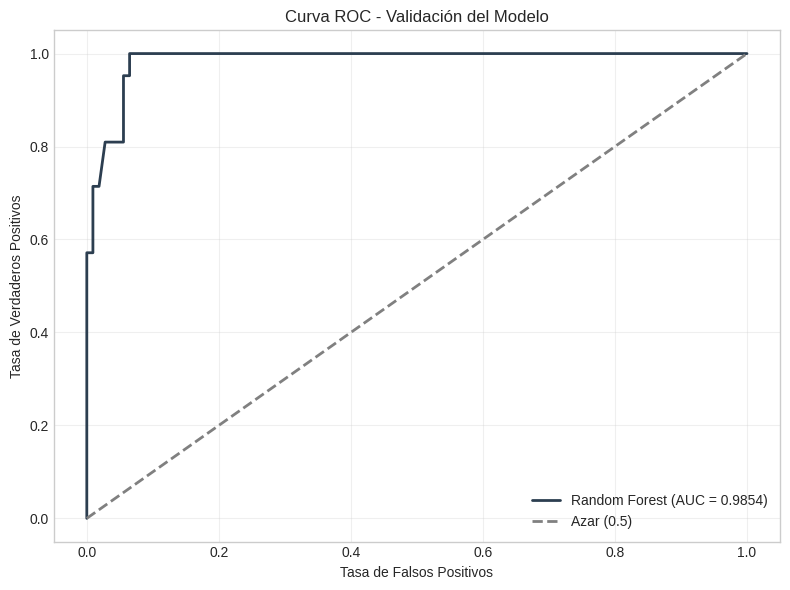

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
import random
import sys

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
optuna.logging.set_verbosity(optuna.logging.WARNING)
CONFIG = {
    'input_path': 'research/dataset_research.csv',
    'test_size': 0.2,
    'random_seed': SEED,
    'cv_folds': 5,
    'optuna_trials': 100
}

def objective(trial: optuna.trial.Trial, X: pd.DataFrame, y: pd.Series) -> float:
    seed = CONFIG['random_seed']

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced'
    }

    model = RandomForestClassifier(**params, random_state=seed, n_jobs=-1)
    cv_strategy = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=seed)

    scores = cross_validate(
        model, X, y, cv=cv_strategy,
        scoring=['balanced_accuracy', 'accuracy'],
        n_jobs=1
    )

    mean_bal_acc = scores['test_balanced_accuracy'].mean()
    std_bal_acc = scores['test_balanced_accuracy'].std()

    mean_acc = scores['test_accuracy'].mean()
    std_acc = scores['test_accuracy'].std()

    trial.set_user_attr("fold_scores", scores['test_balanced_accuracy'].tolist())

    trial.set_user_attr("std_bal_acc", std_bal_acc)
    trial.set_user_attr("mean_acc", mean_acc)
    trial.set_user_attr("std_acc", std_acc)

    return mean_bal_acc

def find_optimal_threshold_bal_acc(y_true, y_scores):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    thresholds = np.append(thresholds, [0.5, 1.0])
    thresholds = np.unique(thresholds)

    best_threshold = 0.5
    best_bal_acc = 0.0

    for threshold in thresholds:
        preds = (y_scores >= threshold).astype(int)
        bal_acc = balanced_accuracy_score(y_true, preds)
        if bal_acc > best_bal_acc:
            best_bal_acc = bal_acc
            best_threshold = threshold

    return best_threshold, best_bal_acc

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='#2c3e50', lw=2, label=f'Random Forest (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Azar (0.5)')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - Validación del Modelo')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("=== INICIANDO OPTIMIZACIÓN RF (OPTUNA + HYPERBAND) ===")

    try:
        data = pd.read_csv(CONFIG['input_path'])
        print(f"Datos cargados. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en: {CONFIG['input_path']}")
        sys.exit()

    X = data.drop('Toxicity', axis=1)
    y = data['Toxicity']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=CONFIG['test_size'], stratify=y, random_state=SEED
    )

    print(f"Ejecutando {CONFIG['optuna_trials']} trials con Hyperband...")

    sampler = TPESampler(seed=SEED)
    pruner = HyperbandPruner(min_resource=1, max_resource=CONFIG['cv_folds'], reduction_factor=3)

    study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=CONFIG['optuna_trials'])

    print("\nOptimización completada.")
    best_trial = study.best_trial

    bal_acc_std = best_trial.user_attrs['std_bal_acc']
    acc_mean = best_trial.user_attrs['mean_acc']
    acc_std = best_trial.user_attrs['std_acc']
    fold_scores = best_trial.user_attrs['fold_scores']

    print(f"\nMEJOR RESULTADO (Validación Cruzada):")
    print(f"   Balanced Accuracy: {best_trial.value:.4f} ± {bal_acc_std:.4f}")
    print(f"   Accuracy General:  {acc_mean:.4f} ± {acc_std:.4f}")

    print("-" * 40)
    print("   Puntajes (Balanced Acc) por Fold:")
    for i, score in enumerate(fold_scores, 1):
        print(f"      Fold {i}: {score:.4f}")
    print("-" * 40)

    print(f"   Hiperparámetros:   {best_trial.params}")
    print("-" * 60)

    print("\nEntrenando modelo final...")

    X_tr_sub, X_val_sub, y_tr_sub, y_val_sub = train_test_split(
        X_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED
    )

    temp_model = RandomForestClassifier(**best_trial.params, random_state=SEED, n_jobs=-1, class_weight='balanced')
    temp_model.fit(X_tr_sub, y_tr_sub)
    val_probs = temp_model.predict_proba(X_val_sub)[:, 1]
    best_thresh, _ = find_optimal_threshold_bal_acc(y_val_sub, val_probs)
    print(f"   Umbral optimizado: {best_thresh:.4f}")

    final_model = RandomForestClassifier(**best_trial.params, random_state=SEED, n_jobs=-1, class_weight='balanced')
    final_model.fit(X_train, y_train)

    test_probs = final_model.predict_proba(X_test)[:, 1]
    test_preds = (test_probs >= best_thresh).astype(int)

    print("\nREPORTE FINAL (TEST SET):")
    print(f"Accuracy:          {accuracy_score(y_test, test_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, test_preds):.4f}")
    print(f"ROC-AUC:           {roc_auc_score(y_test, test_probs):.4f}")

    cm = confusion_matrix(y_test, test_preds)
    print("\nMatriz de Confusión:")
    print(cm)

    print("\n   [Pred 0] [Pred 1]")
    print(f"[Real 0]   {cm[0][0]}      {cm[0][1]}")
    print(f"[Real 1]   {cm[1][0]}      {cm[1][1]}")

    print("\nReporte Clasificación:")
    print(classification_report(y_test, test_preds, digits=4))

    plot_roc_curve(y_test, test_probs)

Support Vector Machine Linear Classifier with Optuna and TPE Hyperparameter Tuning

=== INICIANDO SVM RBF ===
Ejecutando 100 trials...

Optimización completada.

MEJOR RESULTADO (Validación Cruzada):
   Balanced Accuracy: 0.8945 ± 0.0340
   Accuracy General:  0.8813 ± 0.0279
----------------------------------------
   Detalle por Fold (Balanced Acc):
      Fold 1: 0.9299
      Fold 2: 0.9008
      Fold 3: 0.8315
      Fold 4: 0.9170
      Fold 5: 0.8932
----------------------------------------
   Hiperparámetros: {'C': 51.87839193114385, 'gamma': 0.7566049761044609, 'class_weight': 'balanced'}
------------------------------------------------------------

Entrenando modelo final...
   Umbral optimizado: 0.1289

REPORTE FINAL (TEST SET):
Accuracy:          0.8915
Balanced Accuracy: 0.9352
ROC-AUC:           0.9775

Matriz de Confusión:
[[94 14]
 [ 0 21]]

   [Pred 0] [Pred 1]
[Real 0]   94      14
[Real 1]   0      21

Reporte Clasificación:
              precision    recall  f1-score   support

           0     1.0000    0.8704    0.9307       108
           1     0.60

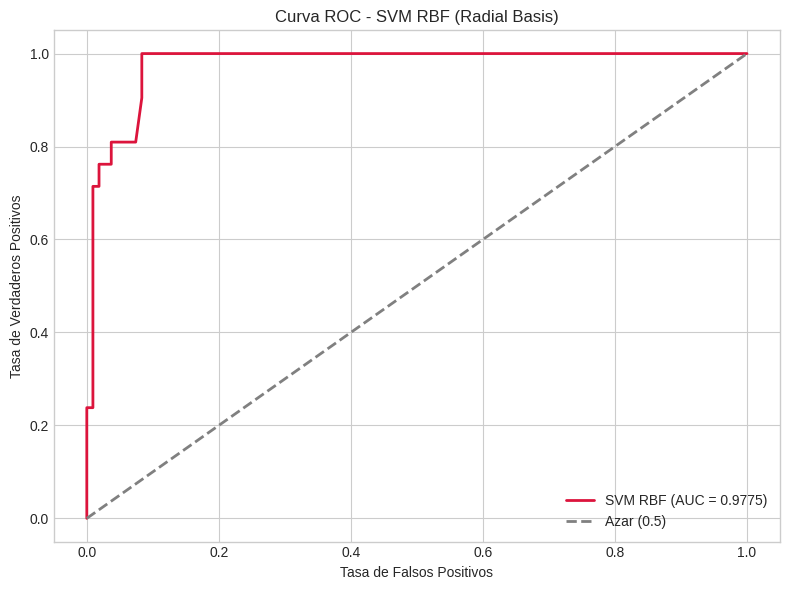

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import random
import sys

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
optuna.logging.set_verbosity(optuna.logging.WARNING)

CONFIG = {
    'input_path': "research/dataset_research.csv",
    'test_size': 0.2,
    'random_seed': SEED,
    'cv_folds': 5,
    'optuna_trials': 100
}

def objective(trial: optuna.trial.Trial, X: pd.DataFrame, y: pd.Series) -> float:
    seed = CONFIG['random_seed']

    params = {
        'C': trial.suggest_float('C', 1e-4, 1e3, log=True),
        'gamma': trial.suggest_float('gamma', 1e-6, 1e1, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svm', SVC(kernel='rbf', probability=True, random_state=seed, **params))
    ])

    cv_strategy = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=seed)

    scores = cross_validate(
        pipeline, X, y, cv=cv_strategy,
        scoring=['balanced_accuracy', 'accuracy'],
        n_jobs=-1
    )

    mean_bal_acc = scores['test_balanced_accuracy'].mean()
    std_bal_acc = scores['test_balanced_accuracy'].std()

    mean_acc = scores['test_accuracy'].mean()
    std_acc = scores['test_accuracy'].std()

    trial.set_user_attr("std_bal_acc", std_bal_acc)
    trial.set_user_attr("mean_acc", mean_acc)
    trial.set_user_attr("std_acc", std_acc)
    trial.set_user_attr("fold_scores_bal", scores['test_balanced_accuracy'].tolist())

    return mean_bal_acc

def find_optimal_threshold_bal_acc(y_true, y_scores):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    thresholds = np.append(thresholds, [0.5, 1.0])
    thresholds = np.unique(thresholds)
    best_threshold = 0.5
    best_bal_acc = 0.0
    for threshold in thresholds:
        preds = (y_scores >= threshold).astype(int)
        bal_acc = balanced_accuracy_score(y_true, preds)
        if bal_acc > best_bal_acc:
            best_bal_acc = bal_acc
            best_threshold = threshold
    return best_threshold, best_bal_acc

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='crimson', lw=2, label=f'SVM RBF (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Azar (0.5)')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - SVM RBF (Radial Basis)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("=== INICIANDO SVM RBF ===")

    try:
        data = pd.read_csv(CONFIG['input_path'])
    except FileNotFoundError:
        print(f"Error de archivo.")
        sys.exit()

    X = data.drop('Toxicity', axis=1)
    y = data['Toxicity']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=CONFIG['test_size'], stratify=y, random_state=SEED
    )

    sampler = TPESampler(seed=SEED)
    pruner = HyperbandPruner(min_resource=1, max_resource=CONFIG['cv_folds'], reduction_factor=3)

    print(f"Ejecutando {CONFIG['optuna_trials']} trials...")
    study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=CONFIG['optuna_trials'])

    print("\nOptimización completada.")
    best_trial = study.best_trial

    bal_acc_std = best_trial.user_attrs['std_bal_acc']
    acc_mean = best_trial.user_attrs['mean_acc']
    acc_std = best_trial.user_attrs['std_acc']
    fold_scores = best_trial.user_attrs['fold_scores_bal']

    print(f"\nMEJOR RESULTADO (Validación Cruzada):")
    print(f"   Balanced Accuracy: {best_trial.value:.4f} ± {bal_acc_std:.4f}")
    print(f"   Accuracy General:  {acc_mean:.4f} ± {acc_std:.4f}")
    print("-" * 40)
    print("   Detalle por Fold (Balanced Acc):")
    for i, score in enumerate(fold_scores, 1):
        print(f"      Fold {i}: {score:.4f}")
    print("-" * 40)
    print(f"   Hiperparámetros: {best_trial.params}")
    print("-" * 60)

    print("\nEntrenando modelo final...")

    X_tr_sub, X_val_sub, y_tr_sub, y_val_sub = train_test_split(
        X_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED
    )
    temp_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svm', SVC(kernel='rbf', probability=True, random_state=SEED, **best_trial.params))
    ])
    temp_pipeline.fit(X_tr_sub, y_tr_sub)
    val_probs = temp_pipeline.predict_proba(X_val_sub)[:, 1]
    best_thresh, _ = find_optimal_threshold_bal_acc(y_val_sub, val_probs)
    print(f"   Umbral optimizado: {best_thresh:.4f}")

    final_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svm', SVC(kernel='rbf', probability=True, random_state=SEED, **best_trial.params))
    ])
    final_pipeline.fit(X_train, y_train)

    test_probs = final_pipeline.predict_proba(X_test)[:, 1]
    test_preds = (test_probs >= best_thresh).astype(int)

    print("\nREPORTE FINAL (TEST SET):")
    print(f"Accuracy:          {accuracy_score(y_test, test_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, test_preds):.4f}")
    print(f"ROC-AUC:           {roc_auc_score(y_test, test_probs):.4f}")

    cm = confusion_matrix(y_test, test_preds)
    print("\nMatriz de Confusión:")
    print(cm)
    print("\n   [Pred 0] [Pred 1]")
    print(f"[Real 0]   {cm[0][0]}      {cm[0][1]}")
    print(f"[Real 1]   {cm[1][0]}      {cm[1][1]}")

    print("\nReporte Clasificación:")
    print(classification_report(y_test, test_preds, digits=4))

    plot_roc_curve(y_test, test_probs)

SVM Poly Kernel Classifier with Optuna and TPE Hyperparameter Tuning

=== INICIANDO OPTIMIZACIÓN SVM POLINOMIAL ===
Datos cargados. Shape: (643, 18)
Ejecutando 100 trials...

Optimización completada.

MEJOR RESULTADO (Validación Cruzada):
   Balanced Accuracy: 0.9048 ± 0.0279
   Accuracy General:  0.9067 ± 0.0225
----------------------------------------
   Detalle por Fold (Balanced Acc):
      Fold 1: 0.9063
      Fold 2: 0.9066
      Fold 3: 0.8545
      Fold 4: 0.9170
      Fold 5: 0.9397
----------------------------------------
   Hiperparámetros: {'C': 3.4631870515771093, 'gamma': 0.7860394965149344, 'degree': 4, 'coef0': 2.2174079931322646, 'class_weight': 'balanced'}
------------------------------------------------------------

Entrenando modelo final...
   Umbral optimizado: 0.1447

REPORTE FINAL (TEST SET - SVM POLY):
Accuracy:          0.8992
Balanced Accuracy: 0.9398
ROC-AUC:           0.9815

Matriz de Confusión:
[[95 13]
 [ 0 21]]

   [Pred 0] [Pred 1]
[Real 0]   95      13
[Real 1]   0      21

Reporte Clasificación:
              precision

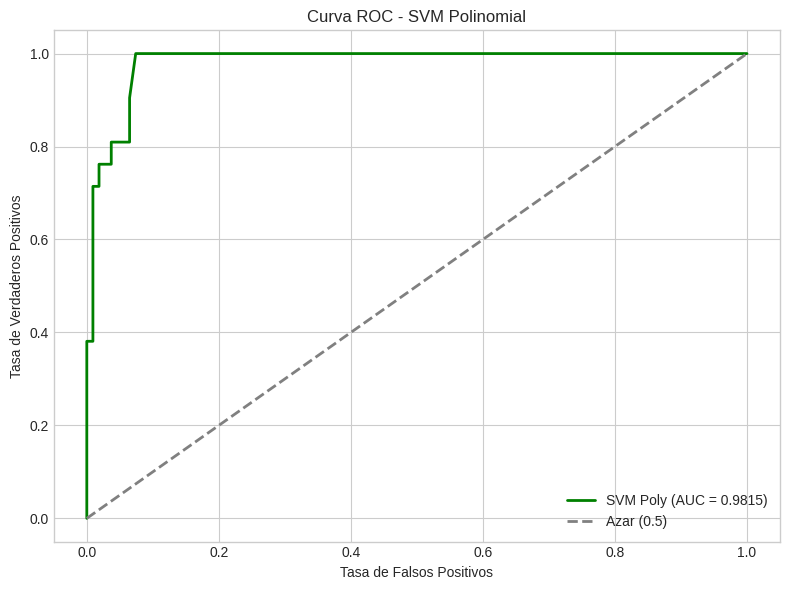

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import random
import sys

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
optuna.logging.set_verbosity(optuna.logging.WARNING)

CONFIG = {
    'input_path': "research/dataset_research.csv",
    'test_size': 0.2,
    'random_seed': SEED,
    'cv_folds': 5,
    'optuna_trials': 100
}

def objective(trial: optuna.trial.Trial, X: pd.DataFrame, y: pd.Series) -> float:
    seed = CONFIG['random_seed']

    params = {
        'C': trial.suggest_float('C', 1e-2, 1e2, log=True),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e0, log=True),
        'degree': trial.suggest_int('degree', 2, 4),
        'coef0': trial.suggest_float('coef0', 0.0, 5.0),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svm', SVC(kernel='poly', probability=False, random_state=seed, **params))
    ])

    cv_strategy = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=seed)

    scores = cross_validate(
        pipeline, X, y, cv=cv_strategy,
        scoring=['balanced_accuracy', 'accuracy'],
        n_jobs=-1
    )

    mean_bal_acc = scores['test_balanced_accuracy'].mean()
    std_bal_acc = scores['test_balanced_accuracy'].std()

    mean_acc = scores['test_accuracy'].mean()
    std_acc = scores['test_accuracy'].std()

    trial.set_user_attr("std_bal_acc", std_bal_acc)
    trial.set_user_attr("mean_acc", mean_acc)
    trial.set_user_attr("std_acc", std_acc)
    trial.set_user_attr("fold_scores_bal", scores['test_balanced_accuracy'].tolist())

    return mean_bal_acc

def find_optimal_threshold_bal_acc(y_true, y_scores):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    thresholds = np.append(thresholds, [0.5, 1.0])
    thresholds = np.unique(thresholds)
    best_threshold = 0.5
    best_bal_acc = 0.0
    for threshold in thresholds:
        preds = (y_scores >= threshold).astype(int)
        bal_acc = balanced_accuracy_score(y_true, preds)
        if bal_acc > best_bal_acc:
            best_bal_acc = bal_acc
            best_threshold = threshold
    return best_threshold, best_bal_acc

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', lw=2, label=f'SVM Poly (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Azar (0.5)')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - SVM Polinomial')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("=== INICIANDO OPTIMIZACIÓN SVM POLINOMIAL ===")

    try:
        data = pd.read_csv(CONFIG['input_path'])
        print(f"Datos cargados. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"Error de archivo.")
        sys.exit()

    X = data.drop('Toxicity', axis=1)
    y = data['Toxicity']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=CONFIG['test_size'], stratify=y, random_state=SEED
    )

    sampler = TPESampler(seed=SEED)
    pruner = HyperbandPruner(min_resource=1, max_resource=CONFIG['cv_folds'], reduction_factor=3)

    print(f"Ejecutando {CONFIG['optuna_trials']} trials...")
    study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=CONFIG['optuna_trials'])

    print("\nOptimización completada.")
    best_trial = study.best_trial

    bal_acc_std = best_trial.user_attrs['std_bal_acc']
    acc_mean = best_trial.user_attrs['mean_acc']
    acc_std = best_trial.user_attrs['std_acc']
    fold_scores = best_trial.user_attrs['fold_scores_bal']

    print(f"\nMEJOR RESULTADO (Validación Cruzada):")
    print(f"   Balanced Accuracy: {best_trial.value:.4f} ± {bal_acc_std:.4f}")
    print(f"   Accuracy General:  {acc_mean:.4f} ± {acc_std:.4f}")
    print("-" * 40)
    print("   Detalle por Fold (Balanced Acc):")
    for i, score in enumerate(fold_scores, 1):
        print(f"      Fold {i}: {score:.4f}")
    print("-" * 40)
    print(f"   Hiperparámetros: {best_trial.params}")
    print("-" * 60)

    print("\nEntrenando modelo final...")

    X_tr_sub, X_val_sub, y_tr_sub, y_val_sub = train_test_split(
        X_train, y_train, test_size=0.2, stratify=y_train, random_state=SEED
    )
    temp_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svm', SVC(kernel='poly', probability=True, random_state=SEED, **best_trial.params))
    ])
    temp_pipeline.fit(X_tr_sub, y_tr_sub)
    val_probs = temp_pipeline.predict_proba(X_val_sub)[:, 1]
    best_thresh, _ = find_optimal_threshold_bal_acc(y_val_sub, val_probs)
    print(f"   Umbral optimizado: {best_thresh:.4f}")

    final_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svm', SVC(kernel='poly', probability=True, random_state=SEED, **best_trial.params))
    ])
    final_pipeline.fit(X_train, y_train)

    test_probs = final_pipeline.predict_proba(X_test)[:, 1]
    test_preds = (test_probs >= best_thresh).astype(int)

    print("\nREPORTE FINAL (TEST SET - SVM POLY):")
    print(f"Accuracy:          {accuracy_score(y_test, test_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, test_preds):.4f}")
    print(f"ROC-AUC:           {roc_auc_score(y_test, test_probs):.4f}")

    cm = confusion_matrix(y_test, test_preds)
    print("\nMatriz de Confusión:")
    print(cm)
    print("\n   [Pred 0] [Pred 1]")
    print(f"[Real 0]   {cm[0][0]}      {cm[0][1]}")
    print(f"[Real 1]   {cm[1][0]}      {cm[1][1]}")

    print("\nReporte Clasificación:")
    print(classification_report(y_test, test_preds, digits=4))

    plot_roc_curve(y_test, test_probs)

MLP Classifier with Optuna and TPE Hyperparameter Tuning

=== INICIANDO OPTIMIZACIÓN MLP ===
Datos cargados. Shape: (643, 18)
Ejecutando 100 trials...

Optimización completada.

MEJOR RESULTADO (Validación Cruzada):
   Balanced Accuracy: 0.8142 ± 0.0438
   Accuracy General:  0.8949 ± 0.0271
   Arquitectura Capas: (256, 127, 253)
----------------------------------------
   Detalle por Fold (Balanced Acc):
      Fold 1: 0.8649
      Fold 2: 0.7592
      Fold 3: 0.8265
      Fold 4: 0.7665
      Fold 5: 0.8539
----------------------------------------
   Hiperparámetros: {'n_layers': 3, 'n_units_l0': 256, 'n_units_l1': 127, 'n_units_l2': 253, 'activation': 'tanh', 'alpha': 0.0020151142145133, 'learning_rate_init': 0.00443493265491706}
------------------------------------------------------------

Entrenando modelo final...
   Calculando umbral óptimo con Cross-Validation Predict...
   Umbral optimizado (CV): 0.3688

REPORTE FINAL (TEST SET - MLP):
Accuracy:          0.8062
Balanced Accuracy: 0.8459
ROC-AUC:           0.9414

Matriz de Confusión:
[

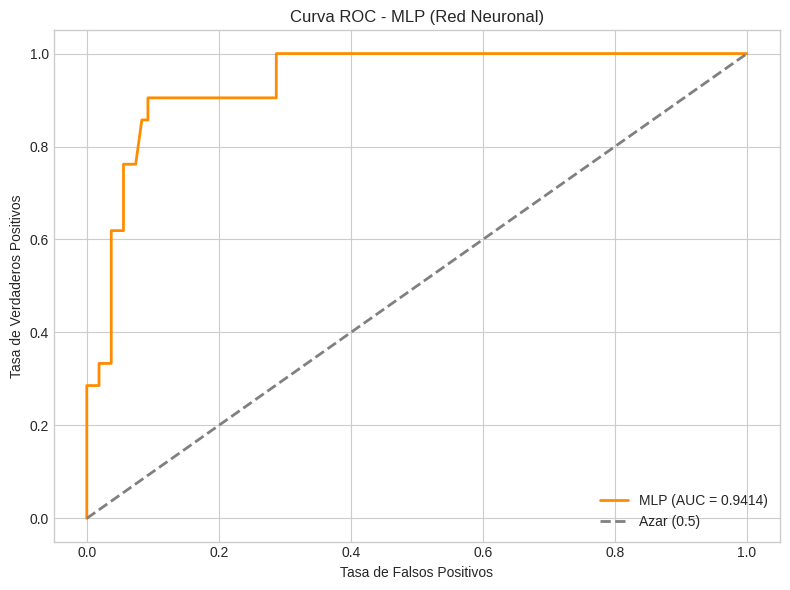

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
import random
import sys

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
optuna.logging.set_verbosity(optuna.logging.WARNING)

CONFIG = {
    'input_path': 'research/dataset_research.csv',
    'test_size': 0.2,
    'random_seed': SEED,
    'cv_folds': 5,
    'optuna_trials': 100
}

def objective(trial: optuna.trial.Trial, X: pd.DataFrame, y: pd.Series) -> float:
    seed = CONFIG['random_seed']

    n_layers = trial.suggest_int('n_layers', 1, 4)
    layers = []
    for i in range(n_layers):
        n_units = trial.suggest_int(f'n_units_l{i}', 16, 256)
        layers.append(n_units)

    params = {
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh']),
        'solver': 'adam',
        'alpha': trial.suggest_float('alpha', 1e-5, 1e-1, log=True),
        'learning_rate_init': trial.suggest_float('learning_rate_init', 1e-4, 1e-2, log=True),
        'max_iter': 500
    }

    mlp = MLPClassifier(
        hidden_layer_sizes=tuple(layers),
        random_state=seed,
        early_stopping=True,
        validation_fraction=0.1,
        **params
    )

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('mlp', mlp)
    ])

    cv_strategy = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=seed)

    scores = cross_validate(
        pipeline, X, y, cv=cv_strategy,
        scoring=['balanced_accuracy', 'accuracy'],
        n_jobs=-1
    )

    mean_bal_acc = scores['test_balanced_accuracy'].mean()
    std_bal_acc = scores['test_balanced_accuracy'].std()

    mean_acc = scores['test_accuracy'].mean()
    std_acc = scores['test_accuracy'].std()

    trial.set_user_attr("std_bal_acc", std_bal_acc)
    trial.set_user_attr("mean_acc", mean_acc)
    trial.set_user_attr("std_acc", std_acc)
    trial.set_user_attr("fold_scores_bal", scores['test_balanced_accuracy'].tolist())
    trial.set_user_attr("layers_config", str(tuple(layers)))

    return mean_bal_acc

def find_optimal_threshold_bal_acc(y_true, y_scores):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    thresholds = np.append(thresholds, [0.5, 1.0])
    thresholds = np.unique(thresholds)

    best_threshold = 0.5
    best_bal_acc = 0.0

    for threshold in thresholds:
        if threshold < 0.01 or threshold > 0.99:
            continue

        preds = (y_scores >= threshold).astype(int)
        bal_acc = balanced_accuracy_score(y_true, preds)
        if bal_acc > best_bal_acc:
            best_bal_acc = bal_acc
            best_threshold = threshold

    return best_threshold, best_bal_acc

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'MLP (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Azar (0.5)')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - MLP (Red Neuronal)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("=== INICIANDO OPTIMIZACIÓN MLP ===")

    try:
        data = pd.read_csv(CONFIG['input_path'])
        print(f"Datos cargados. Shape: {data.shape}")
    except FileNotFoundError:
        print(f"Error de archivo.")
        sys.exit()

    X = data.drop('Toxicity', axis=1)
    y = data['Toxicity']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=CONFIG['test_size'], stratify=y, random_state=SEED
    )

    sampler = TPESampler(seed=SEED)
    pruner = HyperbandPruner(min_resource=1, max_resource=CONFIG['cv_folds'], reduction_factor=3)

    print(f"Ejecutando {CONFIG['optuna_trials']} trials...")
    study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=CONFIG['optuna_trials'])

    print("\nOptimización completada.")
    best_trial = study.best_trial

    bal_acc_std = best_trial.user_attrs['std_bal_acc']
    acc_mean = best_trial.user_attrs['mean_acc']
    acc_std = best_trial.user_attrs['std_acc']
    fold_scores = best_trial.user_attrs['fold_scores_bal']
    best_layers = best_trial.user_attrs['layers_config']

    print(f"\nMEJOR RESULTADO (Validación Cruzada):")
    print(f"   Balanced Accuracy: {best_trial.value:.4f} ± {bal_acc_std:.4f}")
    print(f"   Accuracy General:  {acc_mean:.4f} ± {acc_std:.4f}")
    print(f"   Arquitectura Capas: {best_layers}")
    print("-" * 40)
    print("   Detalle por Fold (Balanced Acc):")
    for i, score in enumerate(fold_scores, 1):
        print(f"      Fold {i}: {score:.4f}")
    print("-" * 40)
    print(f"   Hiperparámetros: {best_trial.params}")
    print("-" * 60)

    print("\nEntrenando modelo final...")

    final_layers = []
    n_layers_best = best_trial.params['n_layers']
    for i in range(n_layers_best):
        final_layers.append(best_trial.params[f'n_units_l{i}'])

    best_mlp_params = {k: v for k, v in best_trial.params.items() if k not in ['n_layers'] and not k.startswith('n_units')}

    final_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('mlp', MLPClassifier(hidden_layer_sizes=tuple(final_layers), random_state=SEED, early_stopping=True, **best_mlp_params))
    ])

    print("   Calculando umbral óptimo con Cross-Validation Predict...")
    cv_strategy = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=SEED)

    y_train_probs = cross_val_predict(
        final_pipeline, X_train, y_train, cv=cv_strategy, method='predict_proba', n_jobs=-1
    )[:, 1]

    best_thresh, best_val_score = find_optimal_threshold_bal_acc(y_train, y_train_probs)
    print(f"   Umbral optimizado (CV): {best_thresh:.4f}")

    final_pipeline.fit(X_train, y_train)

    test_probs = final_pipeline.predict_proba(X_test)[:, 1]
    test_preds = (test_probs >= best_thresh).astype(int)

    print("\nREPORTE FINAL (TEST SET - MLP):")
    print(f"Accuracy:          {accuracy_score(y_test, test_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, test_preds):.4f}")
    print(f"ROC-AUC:           {roc_auc_score(y_test, test_probs):.4f}")

    cm = confusion_matrix(y_test, test_preds)
    print("\nMatriz de Confusión:")
    print(cm)
    print("\n   [Pred 0] [Pred 1]")
    print(f"[Real 0]   {cm[0][0]}      {cm[0][1]}")
    print(f"[Real 1]   {cm[1][0]}      {cm[1][1]}")

    print("\nReporte Clasificación:")
    print(classification_report(y_test, test_preds, digits=4))

    plot_roc_curve(y_test, test_probs)

Graph construction for GAT model

--- Estimando eps para DBSCAN con min_samples=3 ---


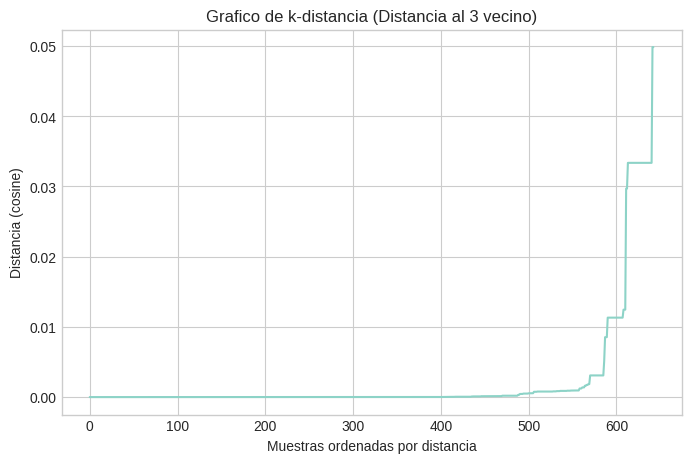

Valor de eps sugerido (cuantil 0.98): 0.0334

--- Ejecutando DBSCAN ---
Numero de clusteres encontrados: 17
Numero de puntos de ruido (outliers): 2
Distribucion de puntos por cluster:
 -1       2
 0      35
 1     166
 2      20
 3      19
 4      20
 5      38
 6      20
 7      19
 8      20
 9      20
 10     19
 11     20
 12     20
 13     38
 14     95
 15     23
 16     49
Name: count, dtype: int64

Silhouette Score: 0.7689
Davies-Bouldin Score: 0.3080
Calinski-Harabasz Score: 973.3717

--- Construyendo grafo con k=5 vecinos intra-cluster ---
Grafo construido con 641 nodos y 1745 aristas.


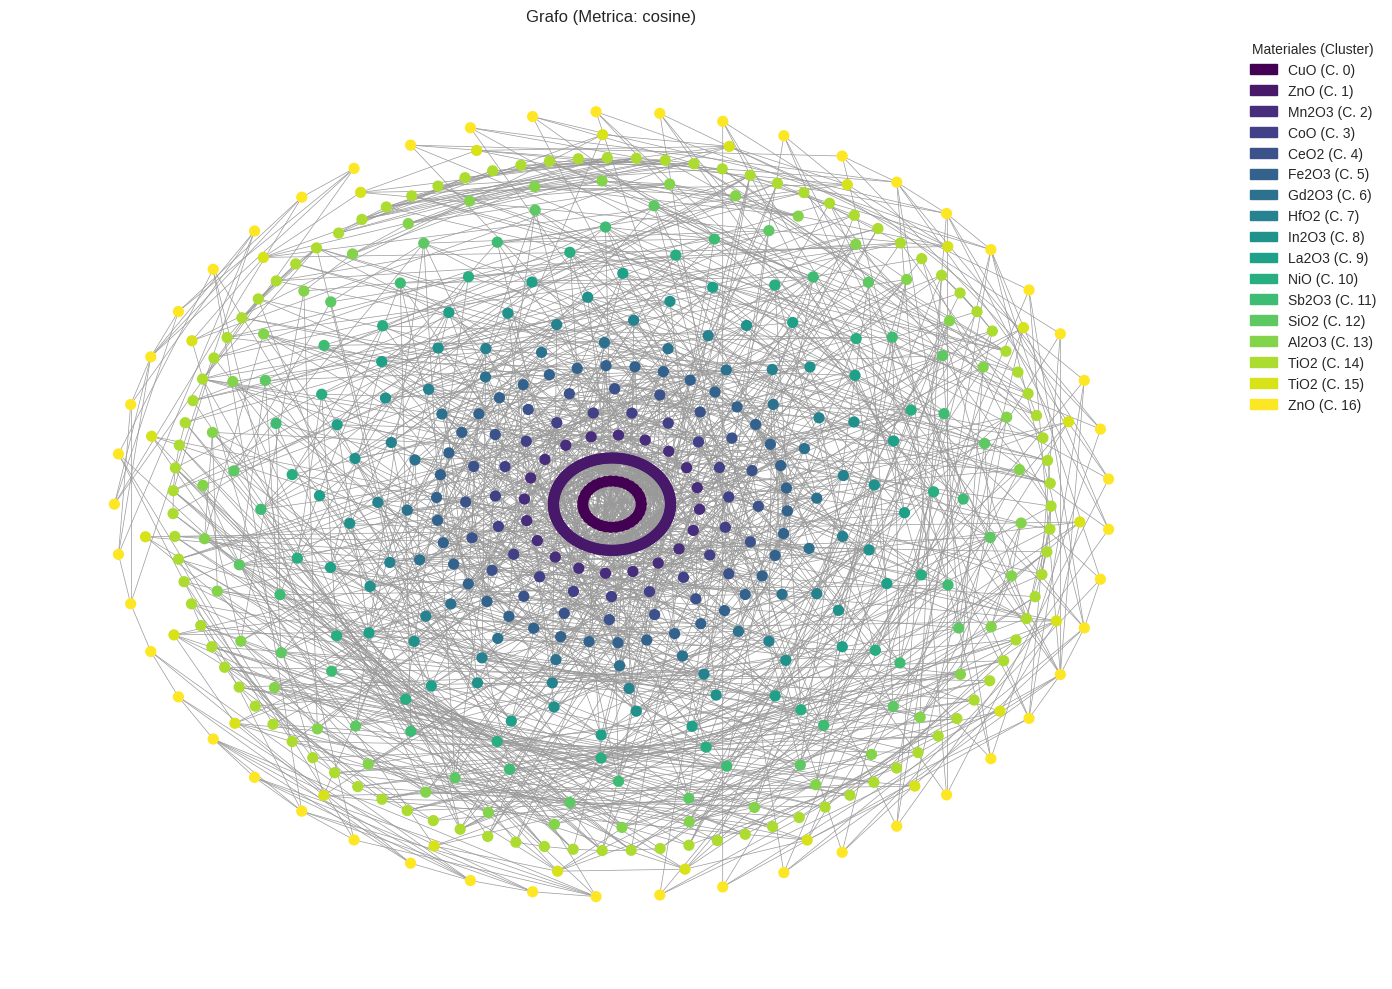

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.patches as mpatches

CONFIG = {
    'input_path': "research/dataset_research.csv",
    'dbscan_metric': 'cosine',
    'min_samples': 3,
    'eps_quantile': 0.98,
    'k_intra_cluster': 5
}

def find_dbscan_eps(X: np.ndarray, min_samples: int, metric: str, quantile: float) -> float:
    print(f"--- Estimando eps para DBSCAN con min_samples={min_samples} ---")
    nbrs = NearestNeighbors(n_neighbors=min_samples, metric=metric).fit(X)
    distances, _ = nbrs.kneighbors(X)
    k_distances = np.sort(distances[:, min_samples - 1])

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.title(f"Grafico de k-distancia (Distancia al {min_samples} vecino)")
    plt.xlabel("Muestras ordenadas por distancia")
    plt.ylabel(f"Distancia ({metric})")
    plt.grid(True)
    plt.show()

    eps_value = float(np.quantile(k_distances, quantile))
    print(f"Valor de eps sugerido (cuantil {quantile:.2f}): {eps_value:.4f}")
    return eps_value

def run_dbscan_clustering(X: np.ndarray, eps: float, min_samples: int, metric: str) -> np.ndarray:
    print("\n--- Ejecutando DBSCAN ---")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, n_jobs=-1)
    labels = dbscan.fit_predict(X)

    n_clusters = len(set(labels) - {-1})
    n_outliers = np.sum(labels == -1)
    print(f"Numero de clusteres encontrados: {n_clusters}")
    print(f"Numero de puntos de ruido (outliers): {n_outliers}")
    print("Distribucion de puntos por cluster:\n", pd.Series(labels).value_counts().sort_index())

    mask = labels != -1
    if n_clusters >= 2 and mask.sum() > 1:
        X_clustered, labels_clustered = X[mask], labels[mask]
        print(f"\nSilhouette Score: {silhouette_score(X_clustered, labels_clustered):.4f}")
        print(f"Davies-Bouldin Score: {davies_bouldin_score(X_clustered, labels_clustered):.4f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_clustered, labels_clustered):.4f}")

    return labels

def build_intra_cluster_knn_graph(X: np.ndarray, labels: np.ndarray, k: int, metric: str) -> nx.Graph:
    print(f"\n--- Construyendo grafo con k={k} vecinos intra-cluster ---")
    G = nx.Graph()
    node_indices = np.where(labels != -1)[0]
    G.add_nodes_from(node_indices)
    all_edges = set()

    for cluster_id in sorted(set(labels) - {-1}):
        indices_in_cluster = np.where(labels == cluster_id)[0]
        if len(indices_in_cluster) <= 1:
            continue

        X_cluster = X[indices_in_cluster]
        n_neighbors = min(k, len(indices_in_cluster) - 1)

        knn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric).fit(X_cluster)
        _, nn_indices = knn.kneighbors(X_cluster)

        for i, neighbors in enumerate(nn_indices):
            source_node = indices_in_cluster[i]
            for neighbor_idx in neighbors:
                target_node = indices_in_cluster[neighbor_idx]
                if source_node != target_node:
                    edge = tuple(sorted((source_node, target_node)))
                    all_edges.add(edge)

    G.add_edges_from(all_edges)
    print(f"Grafo construido con {G.number_of_nodes()} nodos y {G.number_of_edges()} aristas.")
    return G

def plot_graph(G: nx.Graph, labels: np.ndarray, config: dict, cluster_map: dict):
    plt.figure(figsize=(14, 10))
    ax = plt.gca()

    unique_clusters = sorted(list(set(labels[node] for node in G.nodes())))

    shells = []
    for cluster_id in unique_clusters:
        nodes_in_cluster = [node for node in G.nodes() if labels[node] == cluster_id]
        if nodes_in_cluster:
            shells.append(nodes_in_cluster)

    pos = nx.shell_layout(G, nlist=shells)
    node_colors = [labels[node] for node in G.nodes()]
    cmap = plt.cm.viridis
    vmin = min(unique_clusters)
    vmax = max(unique_clusters)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)

    nx.draw(
        G, pos, ax=ax, node_color=node_colors, cmap=cmap, vmin=vmin, vmax=vmax,
        node_size=50, with_labels=False, edge_color='#999999', width=0.5
    )

    legend_patches = []
    for cluster_id, material_name in cluster_map.items():
        if cluster_id in unique_clusters:
            color = cmap(norm(cluster_id))
            label = f"{material_name} (C. {cluster_id})"
            legend_patches.append(mpatches.Patch(color=color, label=label))

    legend_patches.sort(key=lambda x: int(x.get_label().split(' (C. ')[-1].replace(')', '')))

    ax.legend(handles=legend_patches, bbox_to_anchor=(1.02, 1), loc='upper left', title="Materiales (Cluster)")
    plt.title(f"Grafo (Metrica: {config['dbscan_metric']})")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    data = pd.read_csv(CONFIG['input_path'])
    X_features = data.drop(columns=['Toxicity']).to_numpy(dtype=np.float32)

    eps_value = find_dbscan_eps(X_features, CONFIG['min_samples'], CONFIG['dbscan_metric'], CONFIG['eps_quantile'])

    cluster_labels = run_dbscan_clustering(X_features, eps_value, CONFIG['min_samples'], CONFIG['dbscan_metric'])
    data['cluster'] = cluster_labels

    cluster_to_material_map = {}
    material_cols = [col for col in data.columns if col.startswith('Material type_')]
    active_clusters = sorted(list(set(cluster_labels) - {-1}))

    for cid in active_clusters:
        cluster_material_means = data[data['cluster'] == cid][material_cols].mean()
        dominant_material_col = cluster_material_means.idxmax()
        material_name = dominant_material_col.replace('Material type_', '')
        cluster_to_material_map[cid] = material_name

    graph = build_intra_cluster_knn_graph(X_features, cluster_labels, CONFIG['k_intra_cluster'], CONFIG['dbscan_metric'])

    plot_graph(graph, cluster_labels, CONFIG, cluster_to_material_map)


Graph construction for GAT model - saved model

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import torch
from torch_geometric.utils import from_networkx
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

CONFIG = {
    'input_data_path': "research/dataset_research.csv",
    'dbscan_metric': 'cosine',
    'min_samples': 3,
    'eps_quantile': 0.98,
    'k_intra_cluster': 5,
    'pyg_data_output_path': "toxic_graph_data.pt"
}

def find_dbscan_eps(X: np.ndarray, min_samples: int, metric: str, quantile: float) -> float:
    nbrs = NearestNeighbors(n_neighbors=min_samples, metric=metric).fit(X)
    distances, _ = nbrs.kneighbors(X)
    k_distances = np.sort(distances[:, min_samples - 1])
    eps_value = float(np.quantile(k_distances, quantile))
    print(f"Valor de eps sugerido (cuantil {quantile:.2f}): {eps_value:.4f}")
    return eps_value

def run_dbscan_clustering(X: np.ndarray, eps: float, min_samples: int, metric: str) -> np.ndarray:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, n_jobs=-1)
    labels = dbscan.fit_predict(X)
    print(f"DBSCAN encontro {len(set(labels) - {-1})} clusteres y {np.sum(labels == -1)} outliers.")
    return labels

def build_intra_cluster_knn_graph(X: np.ndarray, labels: np.ndarray, k: int, metric: str) -> nx.Graph:
    G = nx.Graph()
    node_indices = np.where(labels != -1)[0]
    G.add_nodes_from(node_indices)

    all_edges = set()
    for cluster_id in sorted(set(labels) - {-1}):
        indices_in_cluster = np.where(labels == cluster_id)[0]
        if len(indices_in_cluster) <= 1:
            continue
        X_cluster = X[indices_in_cluster]
        n_neighbors = min(k, len(indices_in_cluster) - 1)
        knn = NearestNeighbors(n_neighbors=n_neighbors + 1, metric=metric).fit(X_cluster)
        distances, indices = knn.kneighbors(X_cluster)

        for i, neighbors in enumerate(indices):
            source_node_original_idx = indices_in_cluster[i]
            for neighbor_local_idx in neighbors[1:]:
                target_node_original_idx = indices_in_cluster[neighbor_local_idx]
                edge = tuple(sorted((source_node_original_idx, target_node_original_idx)))
                all_edges.add(edge)

    G.add_edges_from(all_edges)
    print(f"Grafo NetworkX construido con {G.number_of_nodes()} nodos y {G.number_of_edges()} aristas.")
    return G

def create_and_save_pyg_data(G: nx.Graph, df: pd.DataFrame, target_col: str, feature_cols: list, output_path: str):
    print("\n--- Iniciando conversion a formato PyTorch Geometric ---")
    node_indices = list(G.nodes())
    df_filtered = df.loc[node_indices].copy()

    mapping = {old_id: new_id for new_id, old_id in enumerate(node_indices)}
    G_relabeled = nx.relabel_nodes(G, mapping, copy=True)
    print(f"Nodos re-etiquetados de 0 a {len(node_indices)-1}.")

    x = torch.from_numpy(df_filtered[feature_cols].to_numpy(dtype=np.float32))
    y = torch.from_numpy(df_filtered[target_col].to_numpy(dtype=np.int64))

    pyg_data = from_networkx(G_relabeled)
    pyg_data.x = x
    pyg_data.y = y

    assert pyg_data.num_nodes == pyg_data.x.shape[0] == pyg_data.y.shape[0]
    print("Comprobaciones de integridad pasadas con exito.")

    torch.save(pyg_data, output_path)
    print(f"\nObjeto PyTorch Geometric guardado en: {output_path}")
    return pyg_data

if __name__ == "__main__":
    try:
        full_data_df = pd.read_csv(CONFIG['input_data_path'])
        print(f"Datos iniciales cargados con {len(full_data_df)} filas.")

        target_column = 'Toxicity'
        feature_columns = [col for col in full_data_df.columns if col != target_column]
        X_features_np = full_data_df[feature_columns].to_numpy(dtype=np.float32)

        eps = find_dbscan_eps(X_features_np, CONFIG['min_samples'], CONFIG['dbscan_metric'], CONFIG['eps_quantile'])
        cluster_labels = run_dbscan_clustering(X_features_np, eps, CONFIG['min_samples'], CONFIG['dbscan_metric'])

        full_data_df['cluster'] = cluster_labels

        graph_nx_real = build_intra_cluster_knn_graph(
            X_features_np, cluster_labels, CONFIG['k_intra_cluster'], CONFIG['dbscan_metric']
        )

        final_pyg_data = create_and_save_pyg_data(
            G=graph_nx_real,
            df=full_data_df,
            target_col=target_column,
            feature_cols=feature_columns,
            output_path=CONFIG['pyg_data_output_path']
        )

        print("\n--- Resumen del objeto PyG final ---")
        print(final_pyg_data)
        print(f"Forma de las caracteristicas (x): {final_pyg_data.x.shape}")
        print(f"Forma del indice de aristas (edge_index): {final_pyg_data.edge_index.shape}")
        print(f"Forma de las etiquetas (y): {final_pyg_data.y.shape}")

    except FileNotFoundError:
        print(f"Error: No se pudo encontrar el archivo de entrada en: {CONFIG['input_data_path']}")
        print("Por favor, verifica la ruta del archivo CSV.")

Datos iniciales cargados con 643 filas.
Valor de eps sugerido (cuantil 0.98): 0.0334
DBSCAN encontro 17 clusteres y 2 outliers.
Grafo NetworkX construido con 641 nodos y 2361 aristas.

--- Iniciando conversion a formato PyTorch Geometric ---
Nodos re-etiquetados de 0 a 640.
Comprobaciones de integridad pasadas con exito.

Objeto PyTorch Geometric guardado en: toxic_graph_data.pt

--- Resumen del objeto PyG final ---
Data(edge_index=[2, 4550], num_nodes=641, x=[641, 17], y=[641])
Forma de las caracteristicas (x): torch.Size([641, 17])
Forma del indice de aristas (edge_index): torch.Size([2, 4550])
Forma de las etiquetas (y): torch.Size([641])


Grafo cargado: 641 nodos.
Iniciando Optuna (TPE) con 100 trials y CV=5...

Optimizacion completada.

MEJOR RESULTADO (Validacion Cruzada):
   Balanced Accuracy:    0.9219 +- 0.0247
--------------------------------------------------
   Detalle por Fold:
      Fold 1: 0.9060
      Fold 2: 0.9477
      Fold 3: 0.9535
      Fold 4: 0.9128
      Fold 5: 0.8895
--------------------------------------------------
   Hiperparametros: {'hidden_channels': 195, 'dropout': 0.37008444151754244, 'lr': 0.0038988461926195307, 'weight_decay': 5.412610686120317e-05, 'num_layers': 3, 'activation': 'relu', 'heads': 4}
------------------------------------------------------------

Entrenando modelo final...
   Umbral optimizado: 0.4877

REPORTE FINAL (TEST SET - GAT):
Accuracy:          0.8992
Balanced Accuracy: 0.9206
ROC-AUC:           0.9788
              precision    recall  f1-score   support

           0     0.9897    0.8889    0.9366       108
           1     0.6250    0.9524    0.7547        21

  

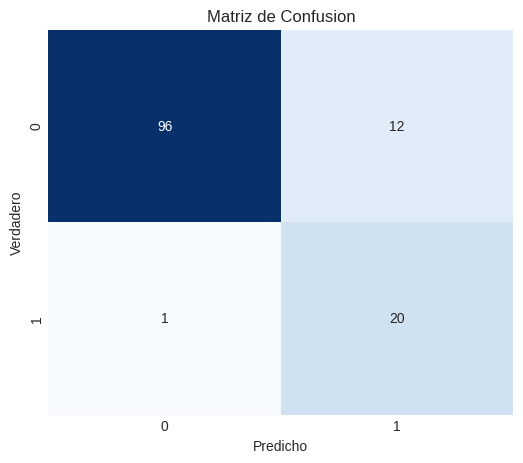

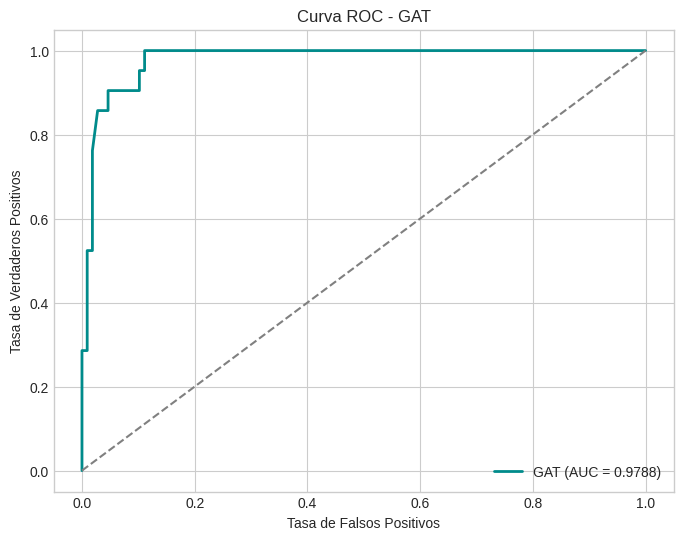

In [9]:
import time
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from torch_geometric.nn import GATConv
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    balanced_accuracy_score, f1_score, roc_auc_score, roc_curve,
    precision_recall_curve)
import warnings
import sys

warnings.filterwarnings("ignore")

CONFIG = {
    'graph_path': "research/toxic_graph_data.pt",
    'device': "cuda" if torch.cuda.is_available() else "cpu",
    'random_seed': 43,
    'test_size': 0.2,
    'optuna_trials': 100,
    'cv_folds': 5
}

OPTUNA_TRAIN_CONFIG = {
    'max_epochs': 60,
    'patience': 10
}

FINAL_TRAIN_CONFIG = {
    'max_epochs': 300,
    'patience': 30
}

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

def get_class_weights(data, mask):
    counts = torch.bincount(data.y[mask]).clamp(min=1)
    num_classes = int(data.y.max().item()) + 1
    return (counts.sum() / (counts * num_classes)).to(data.x.device)

class GAT(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout, num_layers, activation, heads):
        super().__init__()
        if isinstance(activation, str):
            self.activation = {'relu': F.relu, 'tanh': torch.tanh, 'sigmoid': torch.sigmoid}[activation]
        else:
            self.activation = activation
        self.dropout = dropout
        self.convs = nn.ModuleList()

        self.convs.append(GATConv(in_channels, hidden_channels, heads=heads, concat=True, dropout=dropout))

        for _ in range(num_layers - 2):
            self.convs.append(GATConv(hidden_channels * heads, hidden_channels, heads=heads, concat=True, dropout=dropout))

        self.convs.append(GATConv(hidden_channels * heads, out_channels, heads=1, concat=False, dropout=dropout))

    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x

def objective(trial: optuna.trial.Trial, data, train_indices_for_cv) -> float:
    set_seed(CONFIG['random_seed'])
    device = data.x.device

    params = {
        'hidden_channels': trial.suggest_int('hidden_channels', 32, 256),
        'dropout': trial.suggest_float('dropout', 0.2, 0.6),
        'lr': trial.suggest_float('lr', 5e-4, 5e-3, log=True),
        'weight_decay': trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True),
        'num_layers': trial.suggest_int('num_layers', 2, 5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh']),
        'heads': trial.suggest_int('heads', 2, 8)
    }

    model_params = {k: v for k, v in params.items() if k not in ['lr', 'weight_decay']}

    y_full = data.y.cpu().numpy()
    y_train = y_full[train_indices_for_cv]

    skf = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=CONFIG['random_seed'])
    fold_scores = []

    for fold, (train_idx_rel, val_idx_rel) in enumerate(skf.split(train_indices_for_cv, y_train)):

        fold_train_idx = torch.tensor(train_indices_for_cv[train_idx_rel], device=device)
        fold_val_idx = torch.tensor(train_indices_for_cv[val_idx_rel], device=device)

        model = GAT(
            in_channels=data.num_node_features,
            out_channels=int(data.y.max().item()) + 1,
            **model_params
        ).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
        class_weights = get_class_weights(data, fold_train_idx)

        best_fold_bal_acc = 0.0
        wait = 0

        for epoch in range(OPTUNA_TRAIN_CONFIG['max_epochs']):
            model.train()
            optimizer.zero_grad()
            logits = model(data.x, data.edge_index)
            loss = F.cross_entropy(logits[fold_train_idx], data.y[fold_train_idx], weight=class_weights)
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                probs = model(data.x, data.edge_index).softmax(dim=1)[:, 1]
                y_v = data.y[fold_val_idx].cpu().numpy()
                p_v = probs[fold_val_idx].cpu().numpy()
                pred_v = (p_v >= 0.5).astype(int)
                current_bal_acc = balanced_accuracy_score(y_v, pred_v)

            if current_bal_acc > best_fold_bal_acc:
                best_fold_bal_acc = current_bal_acc
                wait = 0
            else:
                wait += 1
                if wait >= OPTUNA_TRAIN_CONFIG['patience']:
                    break

        fold_scores.append(best_fold_bal_acc)

        trial.report(np.mean(fold_scores), fold)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    mean_score = np.mean(fold_scores)
    std_score = np.std(fold_scores)

    trial.set_user_attr("std_cv", std_score)
    trial.set_user_attr("fold_scores", fold_scores)

    return mean_score

class GATFinalTrainer:
    def __init__(self, data, params, seed, train_mask, val_mask):
        self.data = data
        self.params = params
        self.seed = seed
        self.device = data.x.device
        self.train_mask = train_mask
        self.val_mask = val_mask
        self.num_classes = int(data.y.max().item()) + 1

        model_params = {k: v for k, v in params.items() if k not in ['lr', 'weight_decay']}

        self.model = GAT(
            in_channels=data.num_node_features,
            out_channels=self.num_classes,
            **model_params
        ).to(self.device)

        self.optimizer = torch.optim.Adam(
            self.model.parameters(), lr=params['lr'], weight_decay=params['weight_decay']
        )
        self.class_weights = get_class_weights(data, train_mask)

    def train(self):
        best_f1_val, wait, best_state = -1.0, 0, None

        for epoch in range(FINAL_TRAIN_CONFIG['max_epochs']):
            self.model.train()
            self.optimizer.zero_grad()
            logits = self.model(self.data.x, self.data.edge_index)
            loss = F.cross_entropy(logits[self.train_mask], self.data.y[self.train_mask], weight=self.class_weights)
            loss.backward()
            self.optimizer.step()

            self.model.eval()
            with torch.no_grad():
                preds = self.model(self.data.x, self.data.edge_index).argmax(dim=1)
                y_v = self.data.y[self.val_mask].cpu().numpy()
                p_v = preds[self.val_mask].cpu().numpy()
                val_f1 = f1_score(y_v, p_v, pos_label=1, zero_division=0)

            if val_f1 > best_f1_val:
                best_f1_val, wait = val_f1, 0
                best_state = {k: v.cpu().clone() for k, v in self.model.state_dict().items()}
            else:
                wait += 1
                if wait >= FINAL_TRAIN_CONFIG['patience']:
                    break

        if best_state:
            self.model.load_state_dict({k: v.to(self.device) for k, v in best_state.items()})

    def find_optimal_threshold(self):
        self.model.eval()
        with torch.no_grad():
            probs = self.model(self.data.x, self.data.edge_index).softmax(dim=1)[:, 1]

        val_probs = probs[self.val_mask].cpu().numpy()
        y_val = self.data.y[self.val_mask].cpu().numpy()

        best_thr, best_bal_acc = 0.5, -1.0
        for t in np.linspace(0.01, 0.99, 200):
            preds = (val_probs >= t).astype(int)
            bal_acc = balanced_accuracy_score(y_val, preds)
            if bal_acc > best_bal_acc:
                best_thr, best_bal_acc = t, bal_acc
        return best_thr

if __name__ == "__main__":
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    set_seed(CONFIG['random_seed'])

    try:
        data = torch.load(CONFIG['graph_path'], map_location=CONFIG['device'], weights_only=False)
        if hasattr(data, 'to'): data = data.to(CONFIG['device'])
        print(f"Grafo cargado: {data.num_nodes} nodos.")
    except FileNotFoundError:
        print(f"Error: Archivo no encontrado."); sys.exit()

    indices_all = np.arange(data.num_nodes)
    labels_all = data.y.cpu().numpy()

    from sklearn.model_selection import train_test_split
    train_indices, test_indices = train_test_split(
        indices_all, test_size=CONFIG['test_size'], stratify=labels_all, random_state=CONFIG['random_seed']
    )

    test_mask = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    test_mask[test_indices] = True

    print(f"Iniciando Optuna (TPE) con {CONFIG['optuna_trials']} trials y CV={CONFIG['cv_folds']}...")

    sampler = TPESampler(seed=CONFIG['random_seed'])
    pruner = HyperbandPruner(min_resource=1, max_resource=CONFIG['cv_folds'], reduction_factor=3)

    study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, data, train_indices), n_trials=CONFIG['optuna_trials'])

    print("\nOptimizacion completada.")
    best_trial = study.best_trial
    best_std = best_trial.user_attrs['std_cv']

    print(f"\nMEJOR RESULTADO (Validacion Cruzada):")
    print(f"   Balanced Accuracy:    {best_trial.value:.4f} +- {best_std:.4f}")
    print("-" * 50)
    print("   Detalle por Fold:")
    for i, score in enumerate(best_trial.user_attrs['fold_scores'], 1):
        print(f"      Fold {i}: {score:.4f}")
    print("-" * 50)
    print(f"   Hiperparametros: {best_trial.params}")
    print("-" * 60)

    print("\nEntrenando modelo final...")

    tr_idx_final, val_idx_final = train_test_split(
        train_indices, test_size=0.2, stratify=labels_all[train_indices], random_state=CONFIG['random_seed']
    )

    tr_mask_final = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    tr_mask_final[tr_idx_final] = True
    val_mask_final = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    val_mask_final[val_idx_final] = True

    trainer = GATFinalTrainer(data, best_trial.params, CONFIG['random_seed'], tr_mask_final, val_mask_final)
    trainer.train()

    best_thresh = trainer.find_optimal_threshold()
    print(f"   Umbral optimizado: {best_thresh:.4f}")

    trainer.model.eval()
    with torch.no_grad():
        probs = trainer.model(data.x, data.edge_index).softmax(dim=1)[:, 1]

    y_test = data.y[test_mask].cpu().numpy()
    y_probs = probs[test_mask].cpu().numpy()
    y_preds = (y_probs >= best_thresh).astype(int)

    print("\nREPORTE FINAL (TEST SET - GAT):")
    print(f"Accuracy:          {accuracy_score(y_test, y_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_preds):.4f}")
    print(f"ROC-AUC:           {roc_auc_score(y_test, y_probs):.4f}")
    print(classification_report(y_test, y_preds, digits=4))

    cm = confusion_matrix(y_test, y_preds)
    print("Matriz de Confusion:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusion')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkcyan', lw=2, label=f'GAT (AUC = {roc_auc_score(y_test, y_probs):.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - GAT')
    plt.legend(loc='lower right')
    plt.show()

Grafo cargado: 641 nodos.
Iniciando Optuna (TPE) con 100 trials y CV=5...

Optimizacion completada.

MEJOR RESULTADO (Validacion Cruzada):
   Balanced Accuracy:    0.9192 ± 0.0253
--------------------------------------------------
   Detalle por Fold:
      Fold 1: 0.9121
      Fold 2: 0.9535
      Fold 3: 0.9419
      Fold 4: 0.9048
      Fold 5: 0.8837
--------------------------------------------------
   Hiperparametros: {'hidden_channels': 196, 'dropout': 0.20362856569248858, 'lr': 0.0017487862771648375, 'weight_decay': 0.00026569334197100854, 'num_layers': 4, 'activation': 'relu', 'heads': 7}
------------------------------------------------------------

Entrenando modelo final...
   Umbral optimizado: 0.4680

REPORTE FINAL (TEST SET - GAT):
Accuracy:          0.9380
Balanced Accuracy: 0.9630
ROC-AUC:           0.9824
              precision    recall  f1-score   support

           0     1.0000    0.9259    0.9615       108
           1     0.7241    1.0000    0.8400        21

  

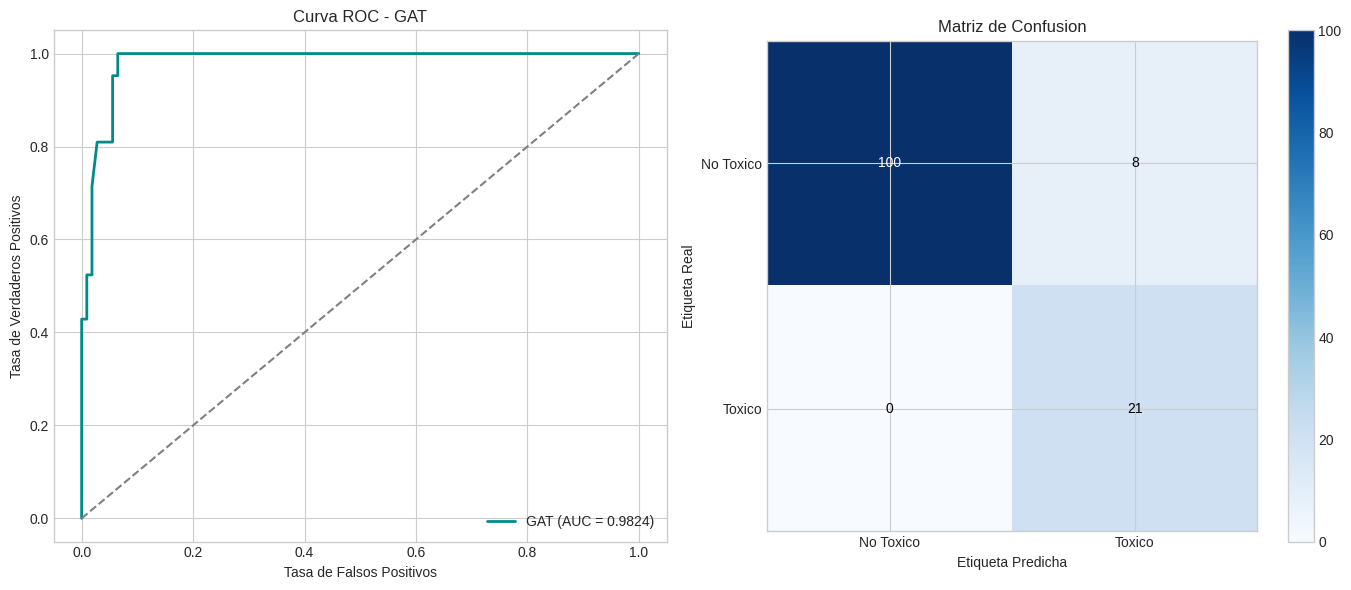

In [8]:
import time
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from torch_geometric.nn import GATConv
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    balanced_accuracy_score, f1_score, roc_auc_score, roc_curve,
    precision_recall_curve
)
import warnings
import sys

warnings.filterwarnings("ignore")

CONFIG = {
    'graph_path': "research/toxic_graph_data.pt",
    'device': "cuda" if torch.cuda.is_available() else "cpu",
    'random_seed': 43,
    'test_size': 0.2,
    'optuna_trials': 100,
    'cv_folds': 5
}

OPTUNA_TRAIN_CONFIG = {
    'max_epochs': 60,
    'patience': 10
}
FINAL_TRAIN_CONFIG = {
    'max_epochs': 300,
    'patience': 30
}

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

def get_class_weights(data, mask):
    counts = torch.bincount(data.y[mask]).clamp(min=1)
    num_classes = int(data.y.max().item()) + 1
    return (counts.sum() / (counts * num_classes)).to(data.x.device)

class GAT(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout, num_layers, activation, heads):
        super().__init__()
        if isinstance(activation, str):
            self.activation = {'relu': F.relu, 'tanh': torch.tanh, 'sigmoid': torch.sigmoid}[activation]
        else:
            self.activation = activation
        self.dropout = dropout
        self.convs = nn.ModuleList()

        self.convs.append(GATConv(in_channels, hidden_channels, heads=heads, concat=True, dropout=dropout))

        for _ in range(num_layers - 2):
            self.convs.append(GATConv(hidden_channels * heads, hidden_channels, heads=heads, concat=True, dropout=dropout))

        self.convs.append(GATConv(hidden_channels * heads, out_channels, heads=1, concat=False, dropout=dropout))

    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x

def objective(trial: optuna.trial.Trial, data, train_indices_for_cv) -> float:
    set_seed(CONFIG['random_seed'])
    device = data.x.device

    params = {
        'hidden_channels': trial.suggest_int('hidden_channels', 32, 256),
        'dropout': trial.suggest_float('dropout', 0.2, 0.6),
        'lr': trial.suggest_float('lr', 5e-4, 5e-3, log=True),
        'weight_decay': trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True),
        'num_layers': trial.suggest_int('num_layers', 2, 5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh']),
        'heads': trial.suggest_int('heads', 2, 8)
    }

    model_params = {k: v for k, v in params.items() if k not in ['lr', 'weight_decay']}

    y_full = data.y.cpu().numpy()
    y_train = y_full[train_indices_for_cv]

    skf = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=CONFIG['random_seed'])
    fold_scores = []

    for fold, (train_idx_rel, val_idx_rel) in enumerate(skf.split(train_indices_for_cv, y_train)):

        fold_train_idx = torch.tensor(train_indices_for_cv[train_idx_rel], device=device)
        fold_val_idx = torch.tensor(train_indices_for_cv[val_idx_rel], device=device)

        model = GAT(
            in_channels=data.num_node_features,
            out_channels=int(data.y.max().item()) + 1,
            **model_params
        ).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
        class_weights = get_class_weights(data, fold_train_idx)

        best_fold_bal_acc = 0.0
        wait = 0

        for epoch in range(OPTUNA_TRAIN_CONFIG['max_epochs']):
            model.train()
            optimizer.zero_grad()
            logits = model(data.x, data.edge_index)
            loss = F.cross_entropy(logits[fold_train_idx], data.y[fold_train_idx], weight=class_weights)
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                probs = model(data.x, data.edge_index).softmax(dim=1)[:, 1]
                y_v = data.y[fold_val_idx].cpu().numpy()
                p_v = probs[fold_val_idx].cpu().numpy()
                pred_v = (p_v >= 0.5).astype(int)
                current_bal_acc = balanced_accuracy_score(y_v, pred_v)

            if current_bal_acc > best_fold_bal_acc:
                best_fold_bal_acc = current_bal_acc
                wait = 0
            else:
                wait += 1
                if wait >= OPTUNA_TRAIN_CONFIG['patience']:
                    break

        fold_scores.append(best_fold_bal_acc)

        trial.report(np.mean(fold_scores), fold)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    mean_score = np.mean(fold_scores)
    std_score = np.std(fold_scores)

    trial.set_user_attr("std_cv", std_score)
    trial.set_user_attr("fold_scores", fold_scores)

    return mean_score

class GATFinalTrainer:
    def __init__(self, data, params, seed, train_mask, val_mask):
        self.data = data
        self.params = params
        self.seed = seed
        self.device = data.x.device
        self.train_mask = train_mask
        self.val_mask = val_mask
        self.num_classes = int(data.y.max().item()) + 1

        model_params = {k: v for k, v in params.items() if k not in ['lr', 'weight_decay']}

        self.model = GAT(
            in_channels=data.num_node_features,
            out_channels=self.num_classes,
            **model_params
        ).to(self.device)

        self.optimizer = torch.optim.Adam(
            self.model.parameters(), lr=params['lr'], weight_decay=params['weight_decay']
        )
        self.class_weights = get_class_weights(data, train_mask)

    def train(self):
        best_f1_val, wait, best_state = -1.0, 0, None

        for epoch in range(FINAL_TRAIN_CONFIG['max_epochs']):
            self.model.train()
            self.optimizer.zero_grad()
            logits = self.model(self.data.x, self.data.edge_index)
            loss = F.cross_entropy(logits[self.train_mask], self.data.y[self.train_mask], weight=self.class_weights)
            loss.backward()
            self.optimizer.step()

            self.model.eval()
            with torch.no_grad():
                preds = self.model(self.data.x, self.data.edge_index).argmax(dim=1)
                y_v = self.data.y[self.val_mask].cpu().numpy()
                p_v = preds[self.val_mask].cpu().numpy()
                val_f1 = f1_score(y_v, p_v, pos_label=1, zero_division=0)

            if val_f1 > best_f1_val:
                best_f1_val, wait = val_f1, 0
                best_state = {k: v.cpu().clone() for k, v in self.model.state_dict().items()}
            else:
                wait += 1
                if wait >= FINAL_TRAIN_CONFIG['patience']:
                    break

        if best_state:
            self.model.load_state_dict({k: v.to(self.device) for k, v in best_state.items()})

    def find_optimal_threshold(self):
        self.model.eval()
        with torch.no_grad():
            probs = self.model(self.data.x, self.data.edge_index).softmax(dim=1)[:, 1]

        val_probs = probs[self.val_mask].cpu().numpy()
        y_val = self.data.y[self.val_mask].cpu().numpy()

        best_thr, best_bal_acc = 0.5, -1.0
        for t in np.linspace(0.01, 0.99, 200):
            preds = (val_probs >= t).astype(int)
            bal_acc = balanced_accuracy_score(y_val, preds)
            if bal_acc > best_bal_acc:
                best_thr, best_bal_acc = t, bal_acc
        return best_thr

if __name__ == "__main__":
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    set_seed(CONFIG['random_seed'])

    try:
        data = torch.load(CONFIG['graph_path'], map_location=CONFIG['device'], weights_only=False)
        if hasattr(data, 'to'): data = data.to(CONFIG['device'])
        print(f"Grafo cargado: {data.num_nodes} nodos.")
    except FileNotFoundError:
        print(f"Error: Archivo no encontrado."); sys.exit()

    indices_all = np.arange(data.num_nodes)
    labels_all = data.y.cpu().numpy()

    from sklearn.model_selection import train_test_split
    train_indices, test_indices = train_test_split(
        indices_all, test_size=CONFIG['test_size'], stratify=labels_all, random_state=CONFIG['random_seed']
    )

    test_mask = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    test_mask[test_indices] = True

    print(f"Iniciando Optuna (TPE) con {CONFIG['optuna_trials']} trials y CV={CONFIG['cv_folds']}...")

    sampler = TPESampler(seed=CONFIG['random_seed'])
    pruner = HyperbandPruner(min_resource=1, max_resource=CONFIG['cv_folds'], reduction_factor=3)

    study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, data, train_indices), n_trials=CONFIG['optuna_trials'])

    print("\nOptimizacion completada.")
    best_trial = study.best_trial
    best_std = best_trial.user_attrs['std_cv']

    print(f"\nMEJOR RESULTADO (Validacion Cruzada):")
    print(f"   Balanced Accuracy:    {best_trial.value:.4f} ± {best_std:.4f}")
    print("-" * 50)
    print("   Detalle por Fold:")
    for i, score in enumerate(best_trial.user_attrs['fold_scores'], 1):
        print(f"      Fold {i}: {score:.4f}")
    print("-" * 50)
    print(f"   Hiperparametros: {best_trial.params}")
    print("-" * 60)

    print("\nEntrenando modelo final...")

    tr_idx_final, val_idx_final = train_test_split(
        train_indices, test_size=0.2, stratify=labels_all[train_indices], random_state=CONFIG['random_seed']
    )

    tr_mask_final = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    tr_mask_final[tr_idx_final] = True
    val_mask_final = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    val_mask_final[val_idx_final] = True

    trainer = GATFinalTrainer(data, best_trial.params, CONFIG['random_seed'], tr_mask_final, val_mask_final)
    trainer.train()

    best_thresh = trainer.find_optimal_threshold()
    print(f"   Umbral optimizado: {best_thresh:.4f}")

    trainer.model.eval()
    with torch.no_grad():
        probs = trainer.model(data.x, data.edge_index).softmax(dim=1)[:, 1]

    y_test = data.y[test_mask].cpu().numpy()
    y_probs = probs[test_mask].cpu().numpy()
    y_preds = (y_probs >= best_thresh).astype(int)

    print("\nREPORTE FINAL (TEST SET - GAT):")
    print(f"Accuracy:          {accuracy_score(y_test, y_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_preds):.4f}")
    print(f"ROC-AUC:           {roc_auc_score(y_test, y_probs):.4f}")
    print(classification_report(y_test, y_preds, digits=4))

    cm = confusion_matrix(y_test, y_preds)
    print("\nMatriz de Confusion:")
    print(cm)

    fpr, tpr, _ = roc_curve(y_test, y_probs)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.plot(fpr, tpr, color='darkcyan', lw=2, label=f'GAT (AUC = {roc_auc_score(y_test, y_probs):.4f})')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('Tasa de Falsos Positivos')
    ax1.set_ylabel('Tasa de Verdaderos Positivos')
    ax1.set_title('Curva ROC - GAT')
    ax1.legend(loc='lower right')

    im = ax2.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax2.figure.colorbar(im, ax=ax2)
    ax2.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            xticklabels=['No Toxico', 'Toxico'],
            yticklabels=['No Toxico', 'Toxico'],
            title='Matriz de Confusion',
            ylabel='Etiqueta Real',
            xlabel='Etiqueta Predicha')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax2.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

In [ ]:
import time
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from torch_geometric.nn import GATConv
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    balanced_accuracy_score, f1_score, roc_auc_score, roc_curve,
    precision_recall_curve)
import warnings
import sys

warnings.filterwarnings("ignore")

CONFIG = {
    'graph_path': "research/toxic_graph_data.pt",
    'device': "cuda" if torch.cuda.is_available() else "cpu",
    'random_seed': 43,
    'test_size': 0.2,
    'optuna_trials': 100,
    'cv_folds': 5
}

OPTUNA_TRAIN_CONFIG = {
    'max_epochs': 60,
    'patience': 10
}

FINAL_TRAIN_CONFIG = {
    'max_epochs': 300,
    'patience': 30
}

def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

def get_class_weights(data, mask):
    counts = torch.bincount(data.y[mask]).clamp(min=1)
    num_classes = int(data.y.max().item()) + 1
    return (counts.sum() / (counts * num_classes)).to(data.x.device)

class GAT(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout, num_layers, activation, heads):
        super().__init__()
        if isinstance(activation, str):
            self.activation = {'relu': F.relu, 'tanh': torch.tanh, 'sigmoid': torch.sigmoid}[activation]
        else:
            self.activation = activation
        self.dropout = dropout
        self.convs = nn.ModuleList()

        self.convs.append(GATConv(in_channels, hidden_channels, heads=heads, concat=True, dropout=dropout))

        for _ in range(num_layers - 2):
            self.convs.append(GATConv(hidden_channels * heads, hidden_channels, heads=heads, concat=True, dropout=dropout))

        self.convs.append(GATConv(hidden_channels * heads, out_channels, heads=1, concat=False, dropout=dropout))

    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x

def objective(trial: optuna.trial.Trial, data, train_indices_for_cv) -> float:
    set_seed(CONFIG['random_seed'])
    device = data.x.device

    params = {
        'hidden_channels': trial.suggest_int('hidden_channels', 32, 256),
        'dropout': trial.suggest_float('dropout', 0.2, 0.6),
        'lr': trial.suggest_float('lr', 5e-4, 5e-3, log=True),
        'weight_decay': trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True),
        'num_layers': trial.suggest_int('num_layers', 2, 5),
        'activation': trial.suggest_categorical('activation', ['relu', 'tanh']),
        'heads': trial.suggest_int('heads', 2, 8)
    }

    model_params = {k: v for k, v in params.items() if k not in ['lr', 'weight_decay']}

    y_full = data.y.cpu().numpy()
    y_train = y_full[train_indices_for_cv]

    skf = StratifiedKFold(n_splits=CONFIG['cv_folds'], shuffle=True, random_state=CONFIG['random_seed'])
    fold_scores = []

    for fold, (train_idx_rel, val_idx_rel) in enumerate(skf.split(train_indices_for_cv, y_train)):

        fold_train_idx = torch.tensor(train_indices_for_cv[train_idx_rel], device=device)
        fold_val_idx = torch.tensor(train_indices_for_cv[val_idx_rel], device=device)

        model = GAT(
            in_channels=data.num_node_features,
            out_channels=int(data.y.max().item()) + 1,
            **model_params
        ).to(device)

        optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
        class_weights = get_class_weights(data, fold_train_idx)

        best_fold_bal_acc = 0.0
        wait = 0

        for epoch in range(OPTUNA_TRAIN_CONFIG['max_epochs']):
            model.train()
            optimizer.zero_grad()
            logits = model(data.x, data.edge_index)
            loss = F.cross_entropy(logits[fold_train_idx], data.y[fold_train_idx], weight=class_weights)
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                probs = model(data.x, data.edge_index).softmax(dim=1)[:, 1]
                y_v = data.y[fold_val_idx].cpu().numpy()
                p_v = probs[fold_val_idx].cpu().numpy()
                pred_v = (p_v >= 0.5).astype(int)
                current_bal_acc = balanced_accuracy_score(y_v, pred_v)

            if current_bal_acc > best_fold_bal_acc:
                best_fold_bal_acc = current_bal_acc
                wait = 0
            else:
                wait += 1
                if wait >= OPTUNA_TRAIN_CONFIG['patience']:
                    break

        fold_scores.append(best_fold_bal_acc)

        trial.report(np.mean(fold_scores), fold)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    mean_score = np.mean(fold_scores)
    std_score = np.std(fold_scores)

    trial.set_user_attr("std_cv", std_score)
    trial.set_user_attr("fold_scores", fold_scores)

    return mean_score

class GATFinalTrainer:
    def __init__(self, data, params, seed, train_mask, val_mask):
        self.data = data
        self.params = params
        self.seed = seed
        self.device = data.x.device
        self.train_mask = train_mask
        self.val_mask = val_mask
        self.num_classes = int(data.y.max().item()) + 1

        model_params = {k: v for k, v in params.items() if k not in ['lr', 'weight_decay']}

        self.model = GAT(
            in_channels=data.num_node_features,
            out_channels=self.num_classes,
            **model_params
        ).to(self.device)

        self.optimizer = torch.optim.Adam(
            self.model.parameters(), lr=params['lr'], weight_decay=params['weight_decay']
        )
        self.class_weights = get_class_weights(data, train_mask)

    def train(self):
        best_f1_val, wait, best_state = -1.0, 0, None

        for epoch in range(FINAL_TRAIN_CONFIG['max_epochs']):
            self.model.train()
            self.optimizer.zero_grad()
            logits = self.model(self.data.x, self.data.edge_index)
            loss = F.cross_entropy(logits[self.train_mask], self.data.y[self.train_mask], weight=self.class_weights)
            loss.backward()
            self.optimizer.step()

            self.model.eval()
            with torch.no_grad():
                preds = self.model(self.data.x, self.data.edge_index).argmax(dim=1)
                y_v = self.data.y[self.val_mask].cpu().numpy()
                p_v = preds[self.val_mask].cpu().numpy()
                val_f1 = f1_score(y_v, p_v, pos_label=1, zero_division=0)

            if val_f1 > best_f1_val:
                best_f1_val, wait = val_f1, 0
                best_state = {k: v.cpu().clone() for k, v in self.model.state_dict().items()}
            else:
                wait += 1
                if wait >= FINAL_TRAIN_CONFIG['patience']:
                    break

        if best_state:
            self.model.load_state_dict({k: v.to(self.device) for k, v in best_state.items()})

    def find_optimal_threshold(self):
        self.model.eval()
        with torch.no_grad():
            probs = self.model(self.data.x, self.data.edge_index).softmax(dim=1)[:, 1]

        val_probs = probs[self.val_mask].cpu().numpy()
        y_val = self.data.y[self.val_mask].cpu().numpy()

        best_thr, best_bal_acc = 0.5, -1.0
        for t in np.linspace(0.01, 0.99, 200):
            preds = (val_probs >= t).astype(int)
            bal_acc = balanced_accuracy_score(y_val, preds)
            if bal_acc > best_bal_acc:
                best_thr, best_bal_acc = t, bal_acc
        return best_thr

if __name__ == "__main__":
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    set_seed(CONFIG['random_seed'])

    try:
        data = torch.load(CONFIG['graph_path'], map_location=CONFIG['device'], weights_only=False)
        if hasattr(data, 'to'): data = data.to(CONFIG['device'])
        print(f"Grafo cargado: {data.num_nodes} nodos.")
    except FileNotFoundError:
        print(f"Error: Archivo no encontrado."); sys.exit()

    indices_all = np.arange(data.num_nodes)
    labels_all = data.y.cpu().numpy()

    from sklearn.model_selection import train_test_split
    train_indices, test_indices = train_test_split(
        indices_all, test_size=CONFIG['test_size'], stratify=labels_all, random_state=CONFIG['random_seed']
    )

    test_mask = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    test_mask[test_indices] = True

    print(f"Iniciando Optuna (TPE) con {CONFIG['optuna_trials']} trials y CV={CONFIG['cv_folds']}...")

    sampler = TPESampler(seed=CONFIG['random_seed'])
    pruner = HyperbandPruner(min_resource=1, max_resource=CONFIG['cv_folds'], reduction_factor=3)

    study = optuna.create_study(direction='maximize', sampler=sampler, pruner=pruner)
    study.optimize(lambda trial: objective(trial, data, train_indices), n_trials=CONFIG['optuna_trials'])

    print("\nOptimizacion completada.")
    best_trial = study.best_trial
    best_std = best_trial.user_attrs['std_cv']

    print(f"\nMEJOR RESULTADO (Validacion Cruzada):")
    print(f"   Balanced Accuracy:    {best_trial.value:.4f} +- {best_std:.4f}")
    print("-" * 50)
    print("   Detalle por Fold:")
    for i, score in enumerate(best_trial.user_attrs['fold_scores'], 1):
        print(f"      Fold {i}: {score:.4f}")
    print("-" * 50)
    print(f"   Hiperparametros: {best_trial.params}")
    print("-" * 60)

    print("\nEntrenando modelo final...")

    tr_idx_final, val_idx_final = train_test_split(
        train_indices, test_size=0.2, stratify=labels_all[train_indices], random_state=CONFIG['random_seed']
    )

    tr_mask_final = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    tr_mask_final[tr_idx_final] = True
    val_mask_final = torch.zeros(data.num_nodes, dtype=torch.bool, device=CONFIG['device'])
    val_mask_final[val_idx_final] = True

    trainer = GATFinalTrainer(data, best_trial.params, CONFIG['random_seed'], tr_mask_final, val_mask_final)
    trainer.train()

    best_thresh = trainer.find_optimal_threshold()
    print(f"   Umbral optimizado: {best_thresh:.4f}")

    trainer.model.eval()
    with torch.no_grad():
        probs = trainer.model(data.x, data.edge_index).softmax(dim=1)[:, 1]

    y_test = data.y[test_mask].cpu().numpy()
    y_probs = probs[test_mask].cpu().numpy()
    y_preds = (y_probs >= best_thresh).astype(int)

    print("\nREPORTE FINAL (TEST SET - GAT):")
    print(f"Accuracy:          {accuracy_score(y_test, y_preds):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_preds):.4f}")
    print(f"ROC-AUC:           {roc_auc_score(y_test, y_probs):.4f}")
    print(classification_report(y_test, y_preds, digits=4))

    cm = confusion_matrix(y_test, y_preds)
    print("Matriz de Confusion:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusion')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkcyan', lw=2, label=f'GAT (AUC = {roc_auc_score(y_test, y_probs):.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - GAT')
    plt.legend(loc='lower right')
    plt.show()